In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import configparser
import math

In [32]:
config = configparser.ConfigParser()
config.read('../build/src/advection.ini')


nIter = int(config['run']['maxIter'])
dt    = float(config['discretization']['dt'])
dVx   = float(config['discretization']['dVx'])
minX  = float(config['discretization']['minRealx'])
maxX  = float(config['discretization']['maxRealx'])
minVx = float(config['discretization']['minRealVx'])

df = pd.read_csv("../build/src/solution.log", sep=",", header=None)

dx = (maxX - minX) / len(df.columns)

print(f"\
nIter : {nIter}\n\
dt    : {dt}\n\
dx    : {dx}\n\
dVx   : {dVx}\n\
minX  : {minX}\n\
maxX  : {maxX}\n\
minVx : {minVx}")

df

nIter : 100
dt    : 0.001
dx    : 0.00048828125
dVx   : 3.14
minX  : 0.0
maxX  : 1.0
minVx : 0.0


0         1         2         3         4         5         6     \
0    0.000000  0.006136  0.012271  0.018407  0.024541  0.030675  0.036807   
1    0.747112  0.743019  0.738899  0.734750  0.730574  0.726371  0.722140   
2   -0.993208 -0.993903 -0.994561 -0.995181 -0.995764 -0.996310 -0.996818   
3    0.573255  0.578272  0.583267  0.588240  0.593191  0.598120  0.603026   
4    0.231124  0.225150  0.219168  0.213177  0.207178  0.201171  0.195157   
..        ...       ...       ...       ...       ...       ...       ...   
507  0.481677  0.476290  0.470886  0.465464  0.460025  0.454568  0.449094   
508 -0.974900 -0.973516 -0.972095 -0.970637 -0.969143 -0.967612 -0.966045   
509  0.814353  0.817898  0.821413  0.824897  0.828350  0.831772  0.835163   
510 -0.107697 -0.113795 -0.119889 -0.125978 -0.132063 -0.138143 -0.144217   
511 -0.671180 -0.666619 -0.662033 -0.657422 -0.652786 -0.648126 -0.643441   

         7         8         9     ...      2038      2039      2040  \
0    0.042938  0.049068  0.055195  ... -0.061321 -0.055195 -0.049068   
1    0.717882  0.713597  0.709285  ...  0.786466  0.782661  0.778827   
2   -0.997288 -0.997721 -0.998116  ... -0.984204 -0.985272 -0.986302   
3    0.607909  0.612770  0.617607  ...  0.521932  0.527156  0.532360   
4    0.189135  0.183107  0.177071  ...  0.290350  0.284473  0.278585   
..        ...       ...       ...  ...       ...       ...       ...   
507  0.443604  0.438096  0.432572  ...  0.534509  0.529313  0.524097   
508 -0.964441 -0.962802 -0.961126  ... -0.986718 -0.985703 -0.984651   
509  0.838522  0.841849  0.845145  ...  0.777231  0.781077  0.784894   
510 -0.150286 -0.156350 -0.162407  ... -0.046530 -0.052659 -0.058785   
511 -0.638732 -0.633998 -0.629241  ... -0.715374 -0.711073 -0.706746   

         2041      2042      2043      2044      2045      2046      2047  
0   -0.042938 -0.036807 -0.030675 -0.024541 -0.018407 -0.012271 -0.006136  
1    0.774964  0.771071  0.767150  0.763199  0.759220  0.755213  0.751176  
2   -0.987296 -0.988252 -0.989172 -0.990053 -0.990898 -0.991705 -0.992475  
3    0.537544  0.542708  0.547851  0.552974  0.558076  0.563157  0.568217  
4    0.272687  0.266778  0.260860  0.254931  0.248994  0.243046  0.237090  
..        ...       ...       ...       ...       ...       ...       ...  
507  0.518861  0.513606  0.508332  0.503038  0.497726  0.492395  0.487045  
508 -0.983561 -0.982435 -0.981271 -0.980071 -0.978833 -0.977559 -0.976248  
509  0.788681  0.792439  0.796167  0.799864  0.803532  0.807169  0.810776  
510 -0.064909 -0.071031 -0.077150 -0.083266 -0.089379 -0.095489 -0.101595  
511 -0.702391 -0.698011 -0.693604 -0.689171 -0.684712 -0.680227 -0.675716  

[512 rows x 2048 columns]

Vx[0] = 0.0


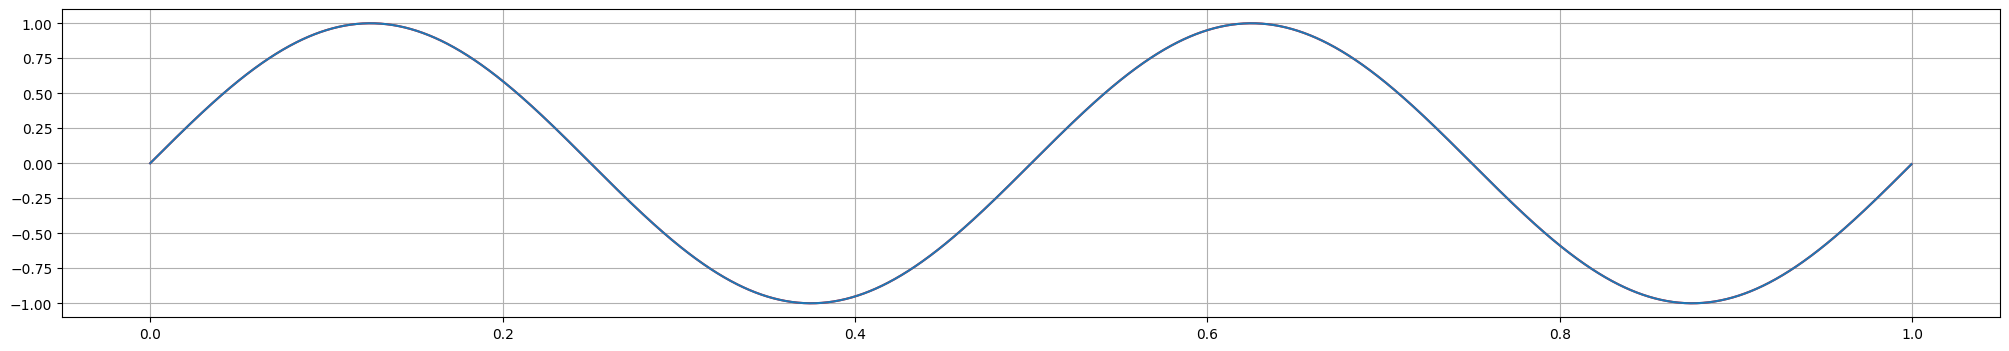

Vx[1] = 3.14


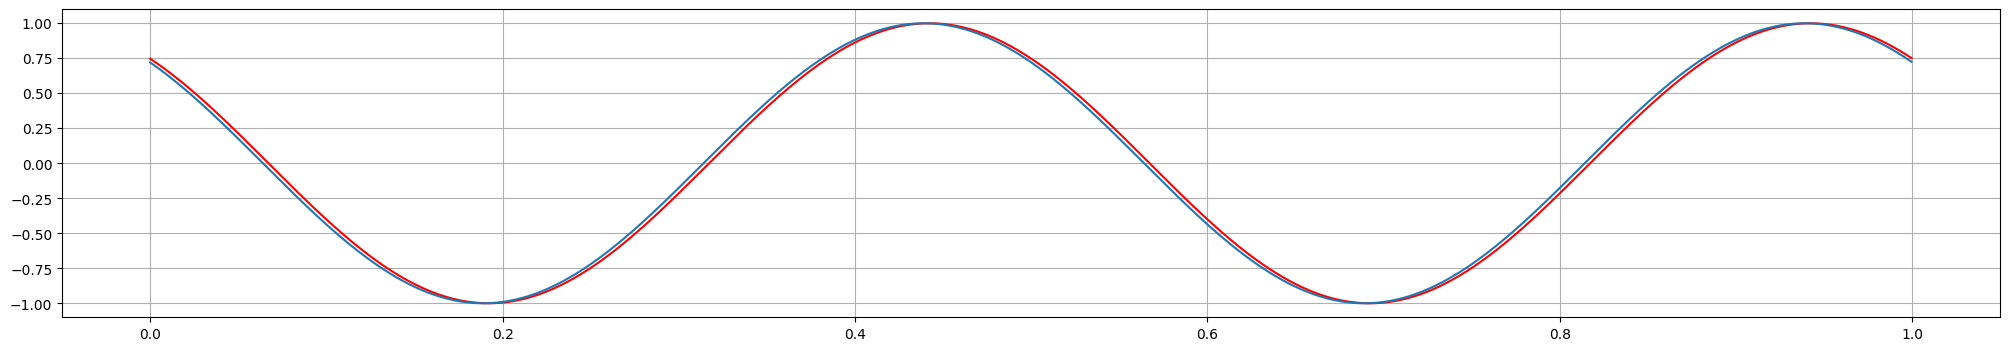

Vx[2] = 6.28


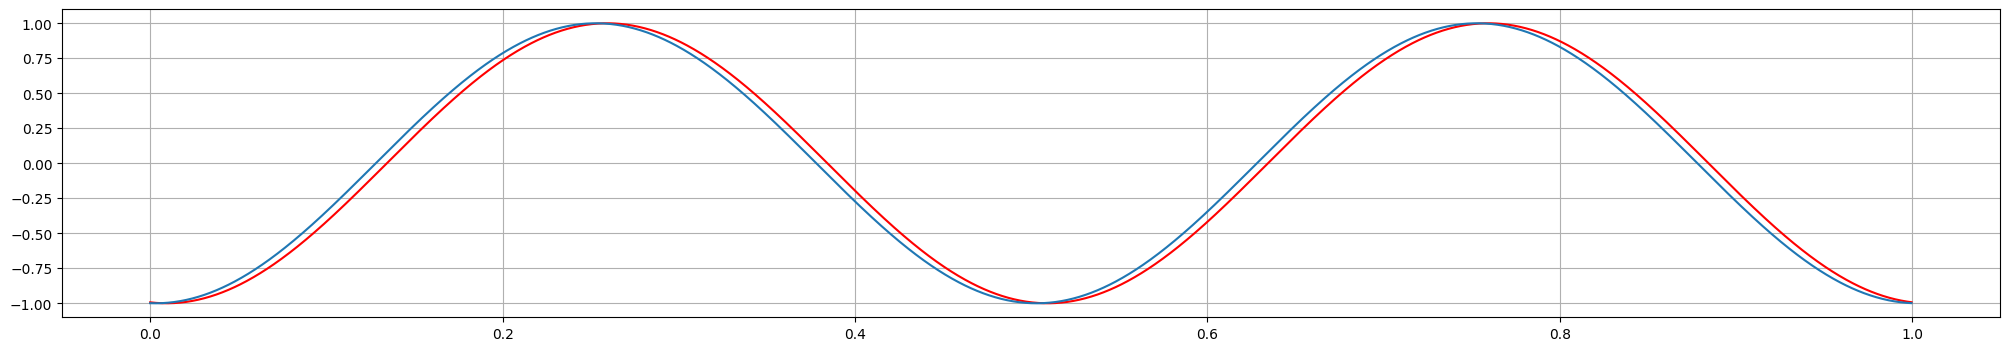

Vx[3] = 9.42


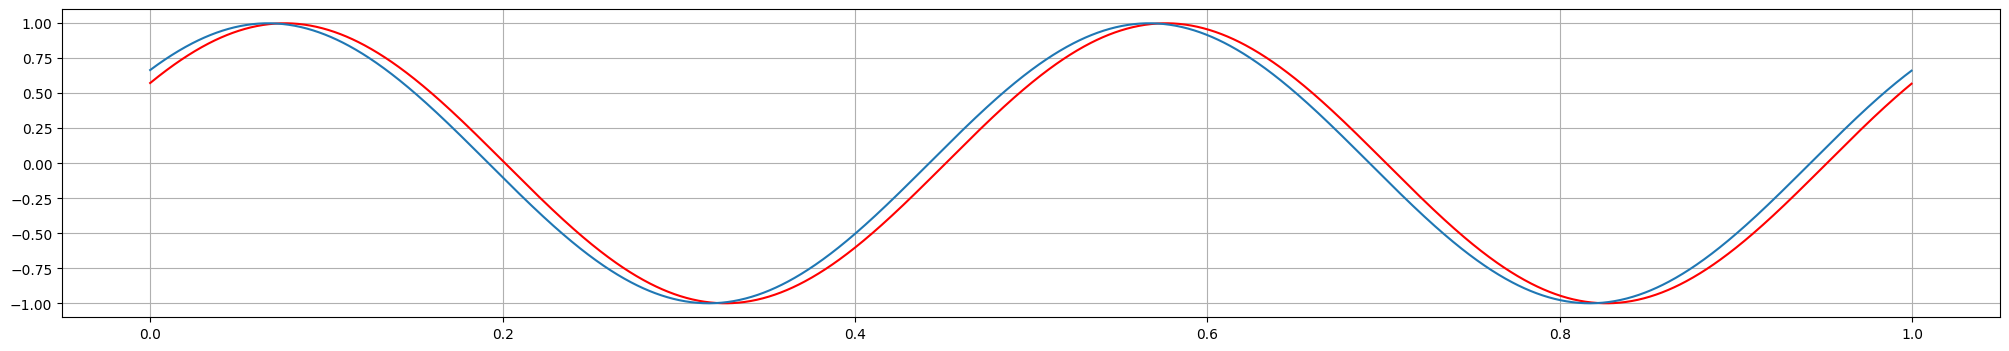

Vx[4] = 12.56


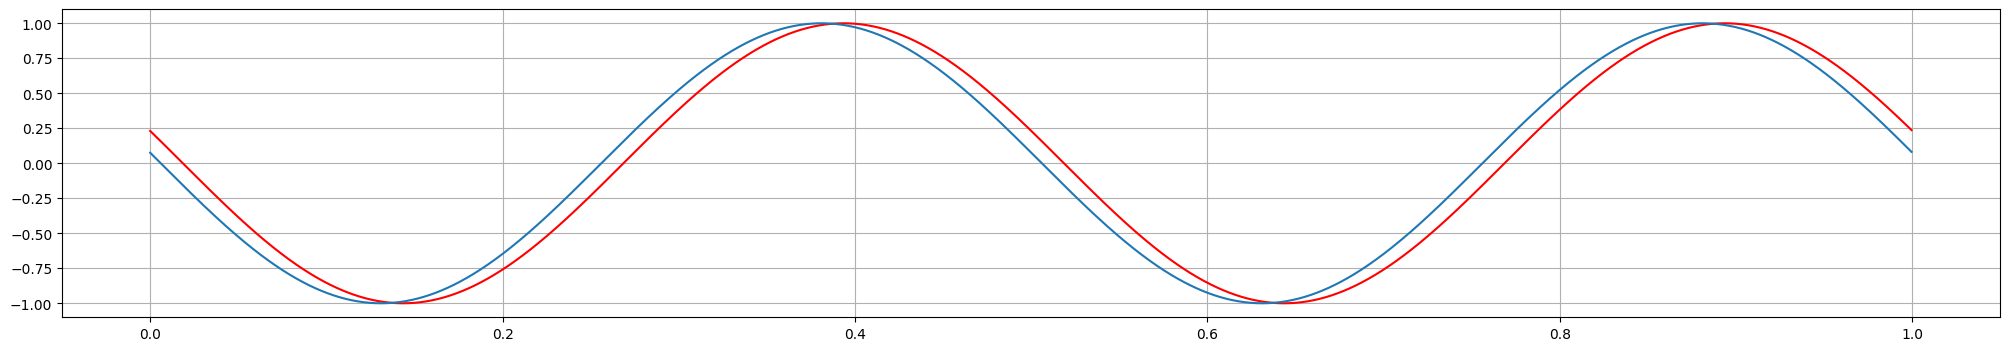

Vx[5] = 15.700000000000001


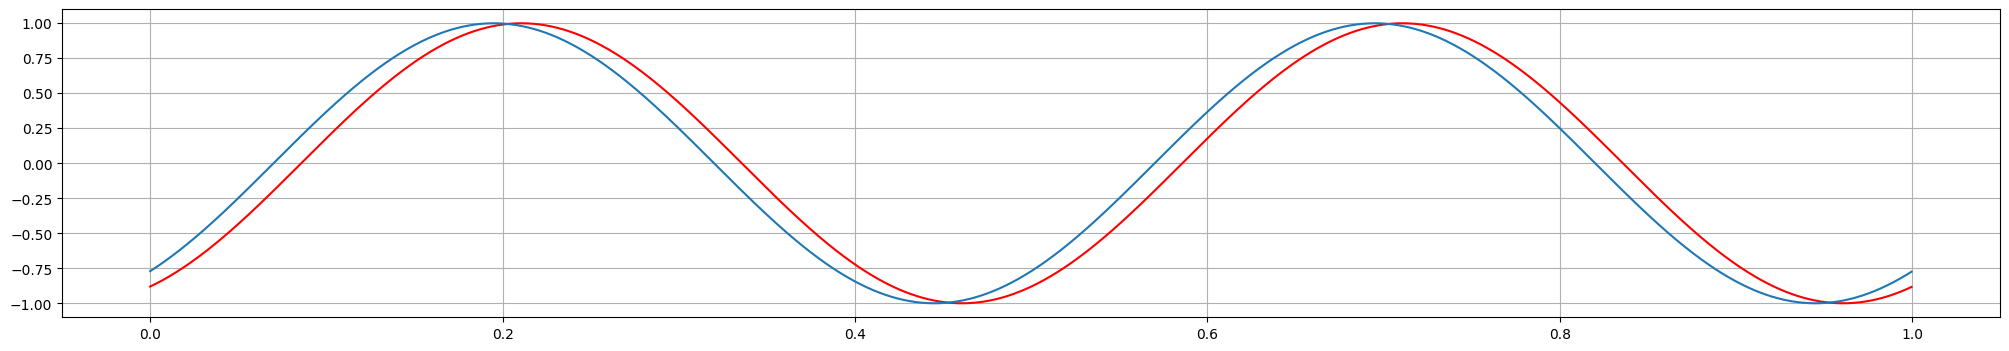

Vx[6] = 18.84


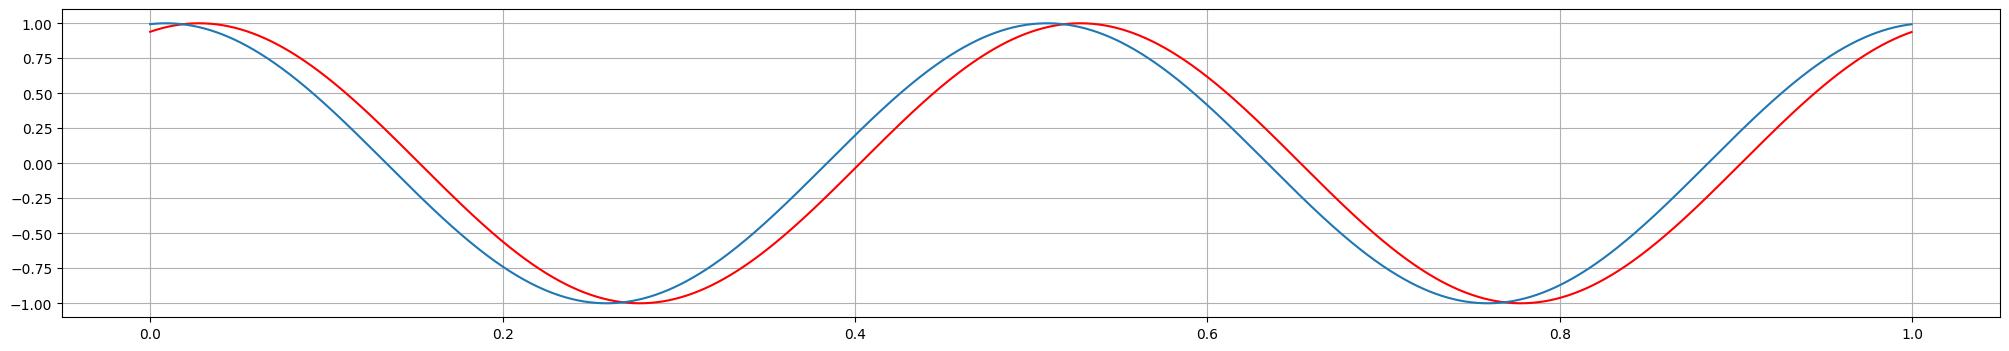

Vx[7] = 21.98


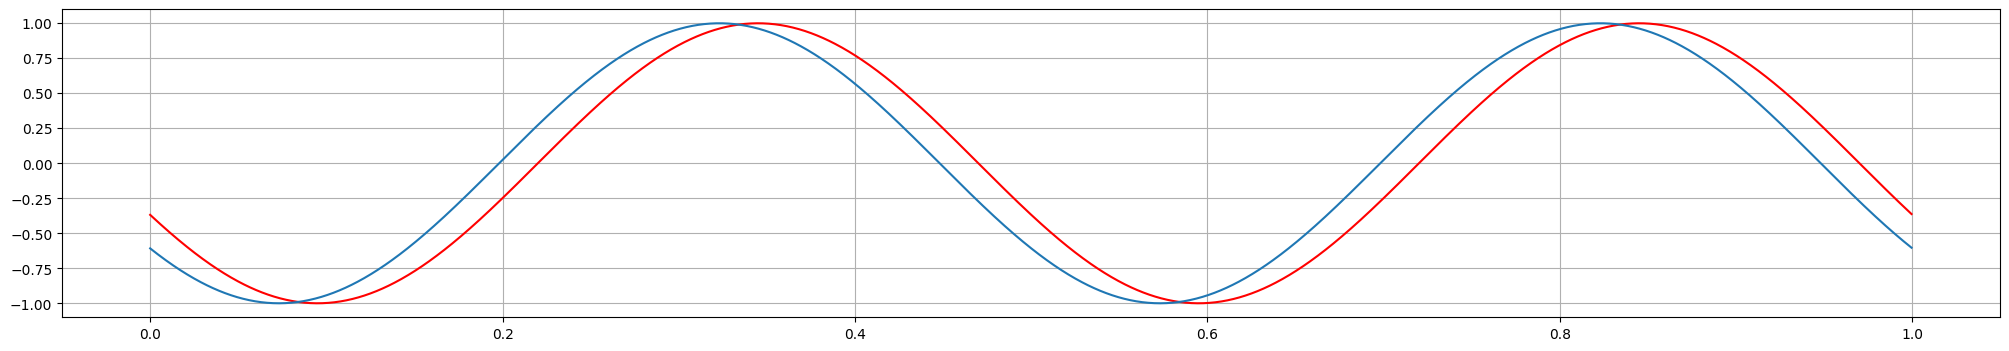

Vx[8] = 25.12


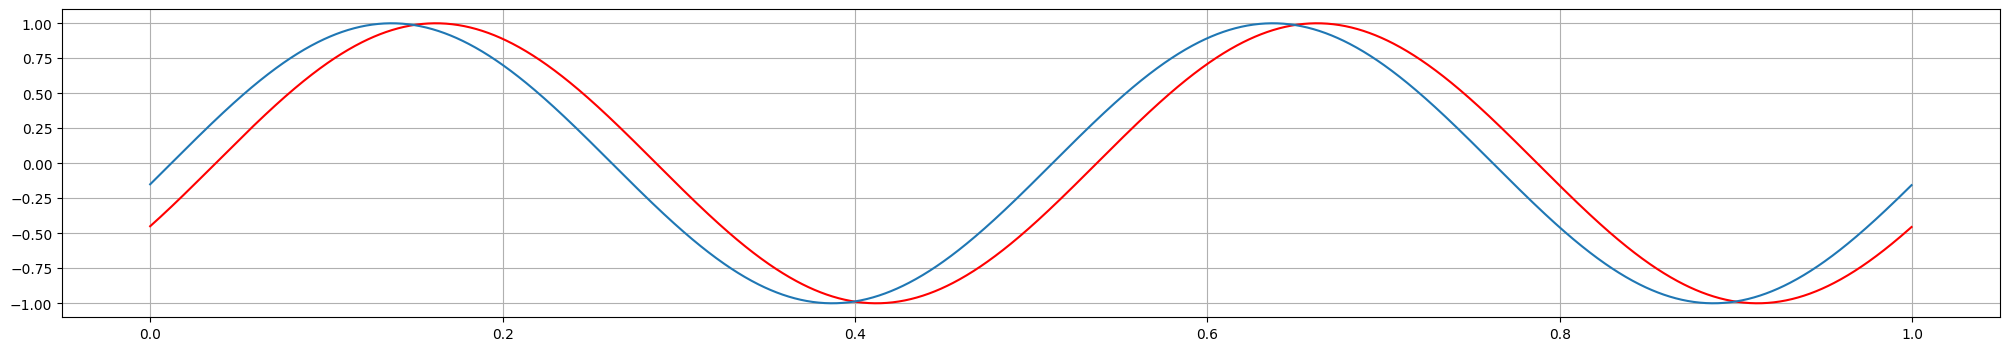

Vx[9] = 28.26


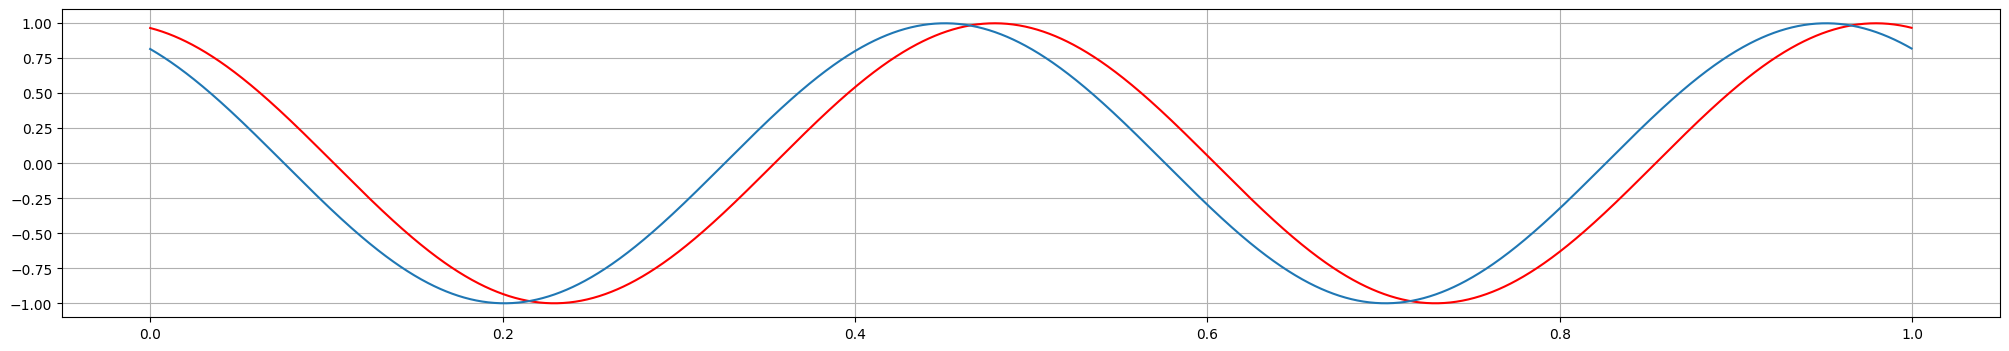

Vx[10] = 31.400000000000002


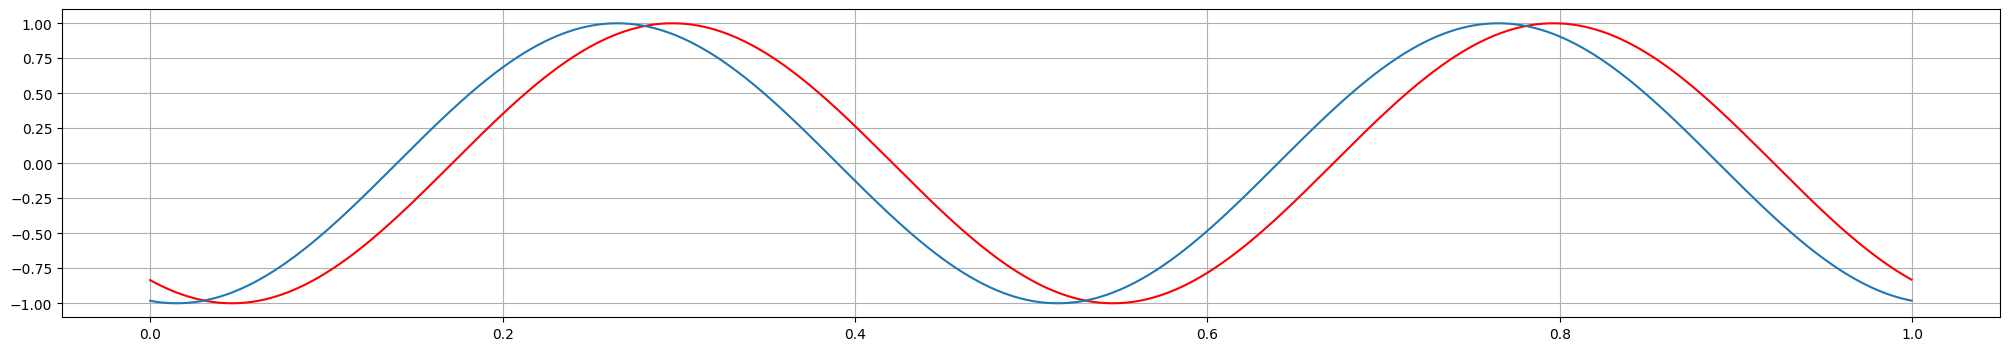

Vx[11] = 34.54


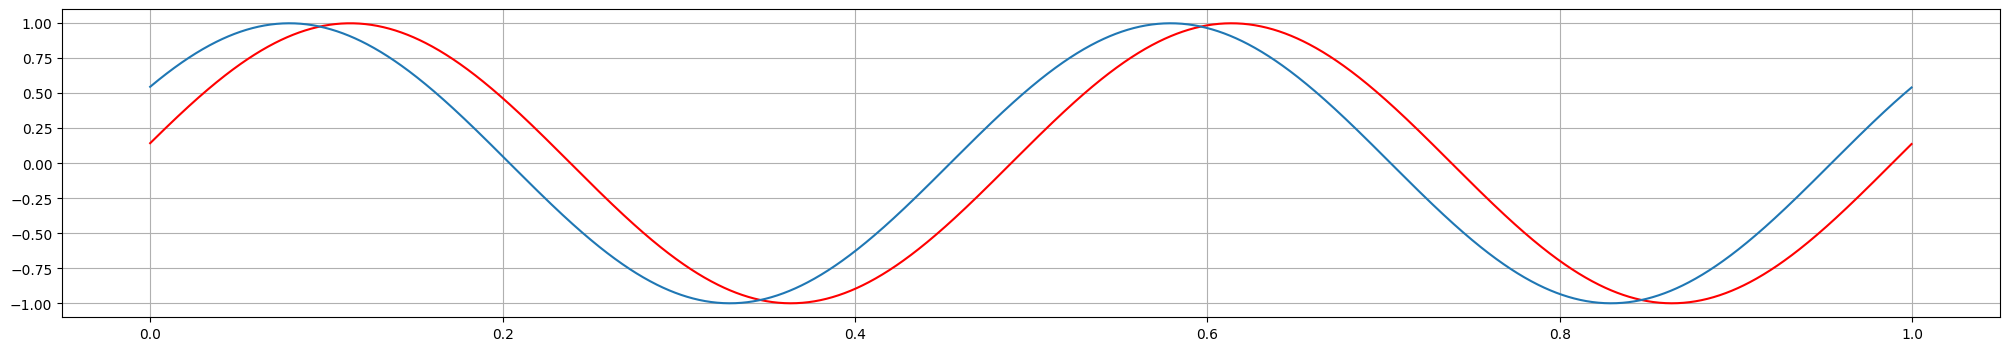

Vx[12] = 37.68


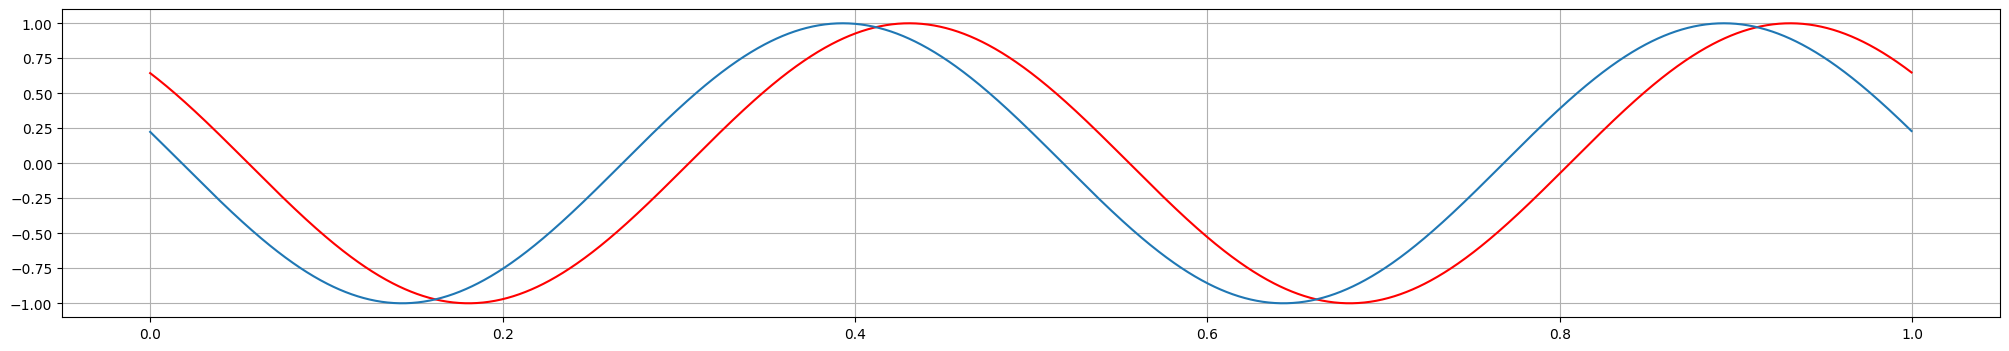

Vx[13] = 40.82


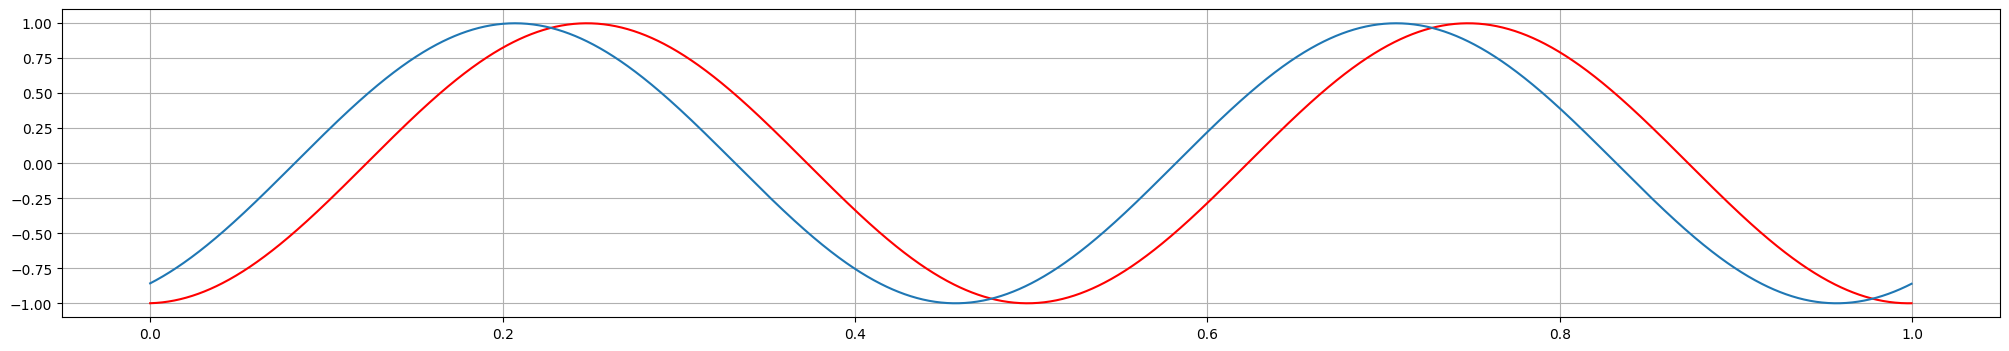

Vx[14] = 43.96


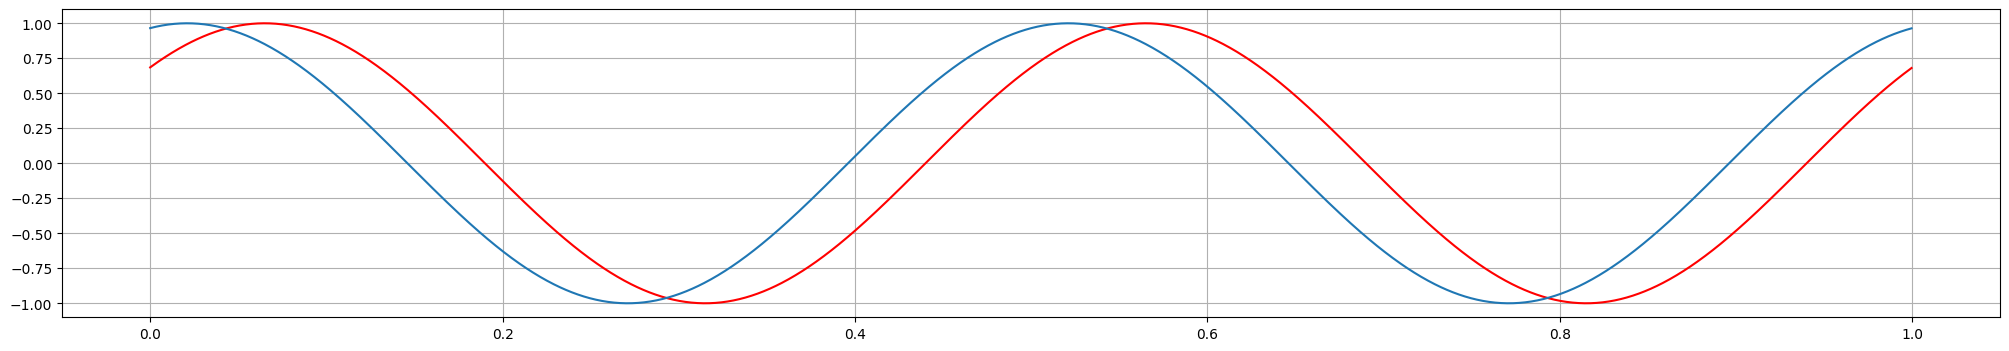

Vx[15] = 47.1


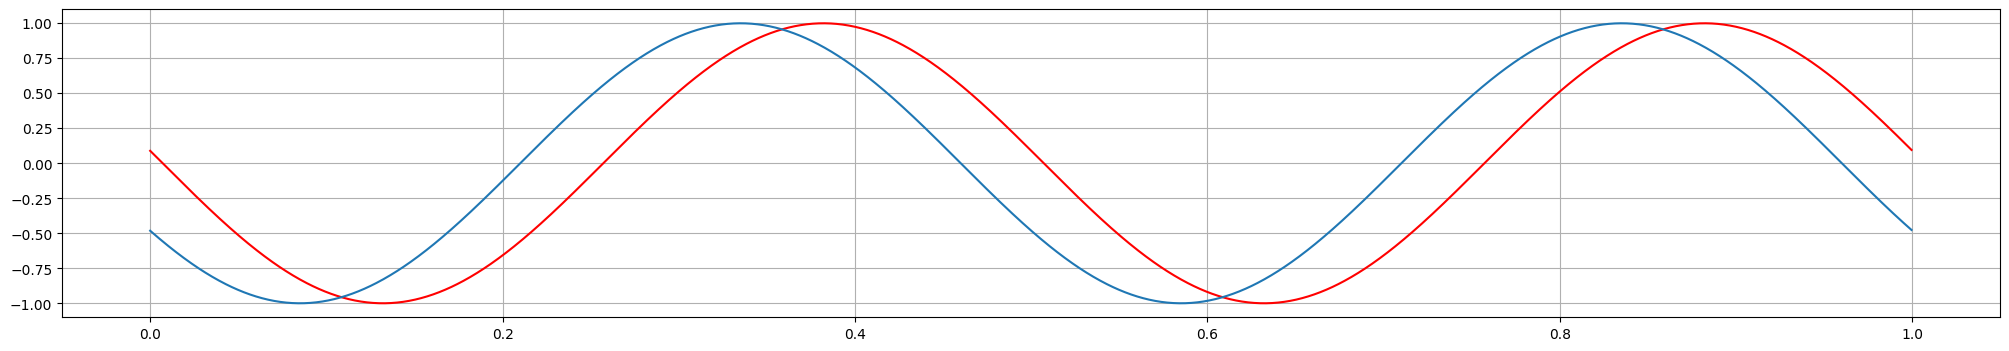

Vx[16] = 50.24


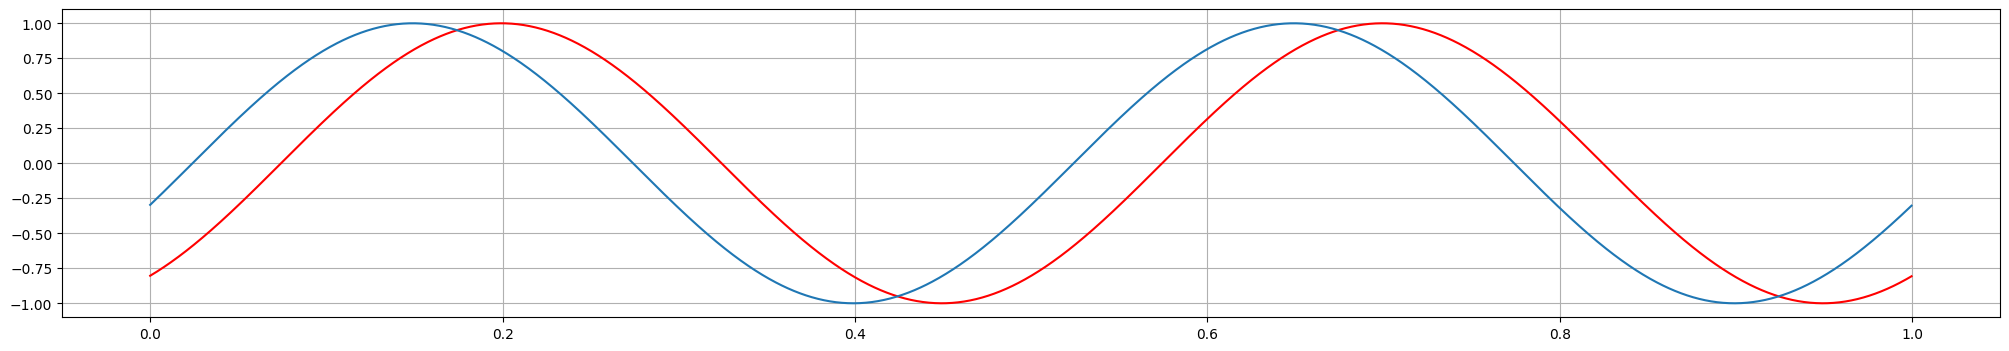

Vx[17] = 53.38


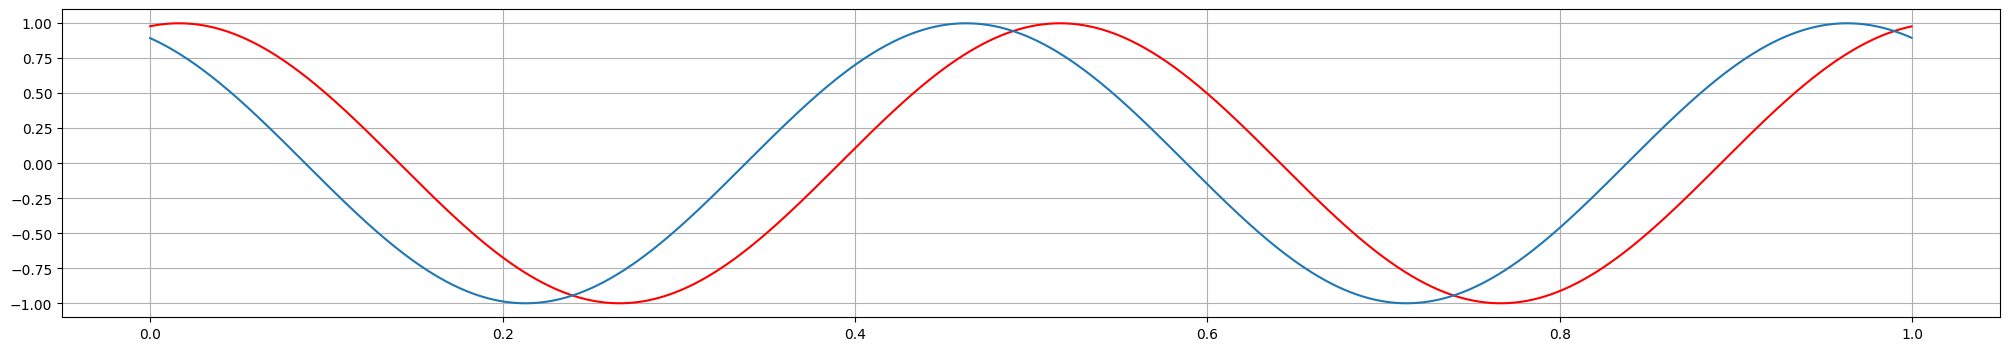

Vx[18] = 56.52


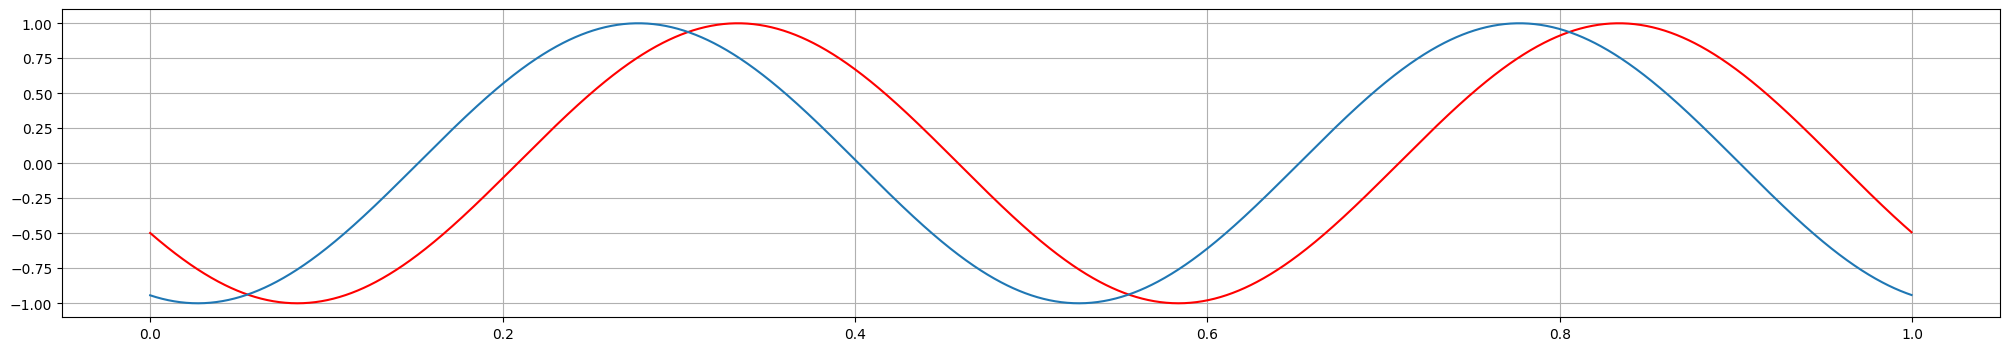

Vx[19] = 59.660000000000004


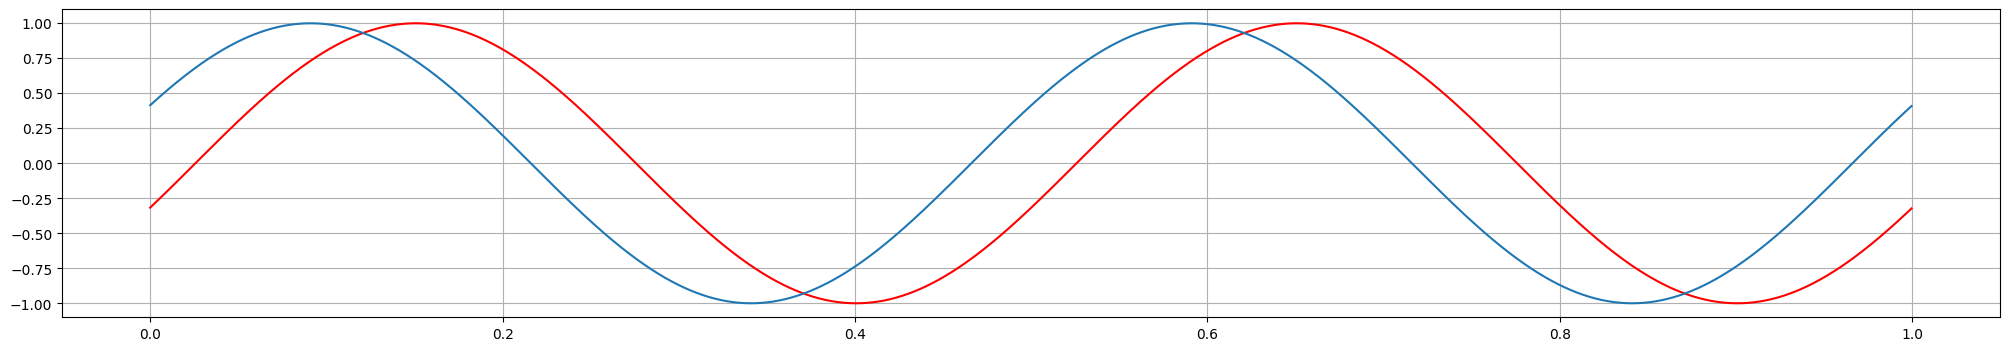

Vx[20] = 62.800000000000004


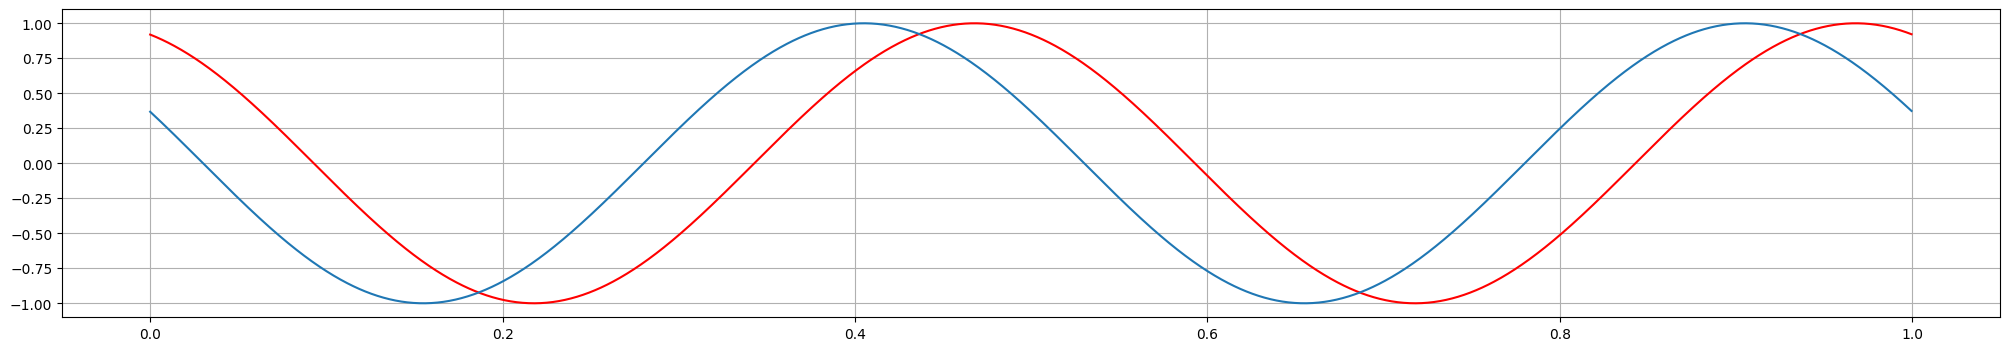

Vx[21] = 65.94


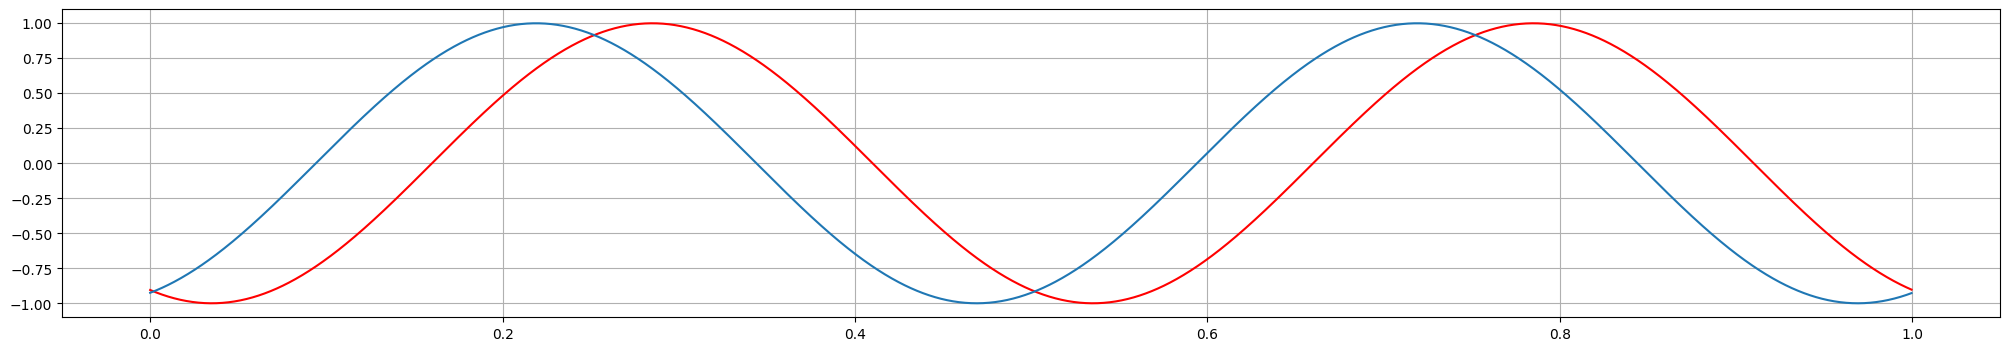

Vx[22] = 69.08


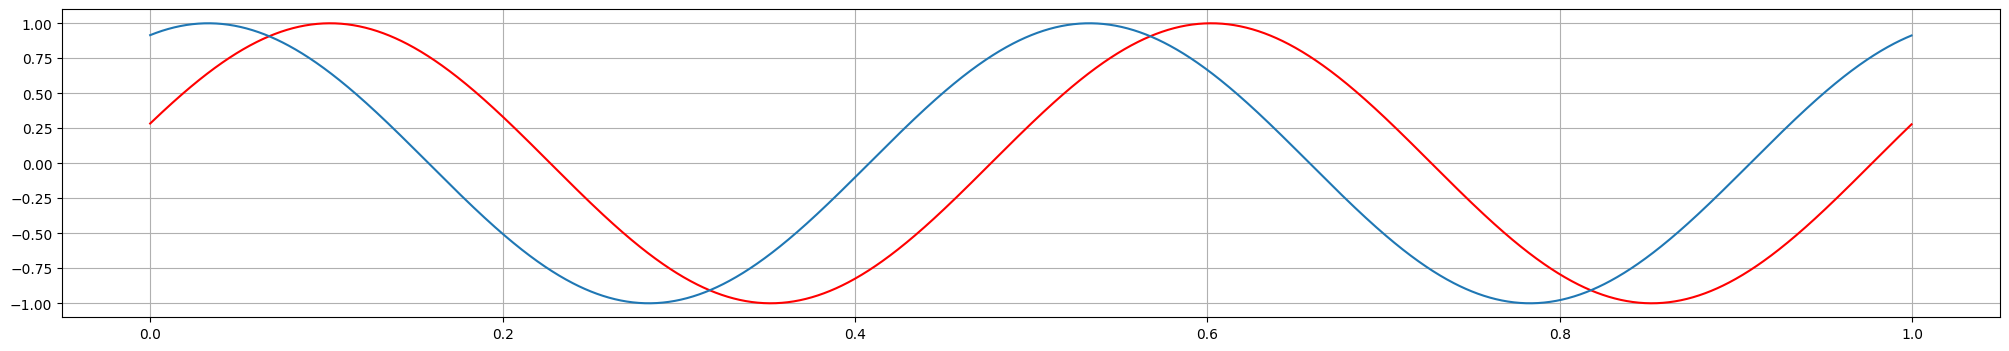

Vx[23] = 72.22


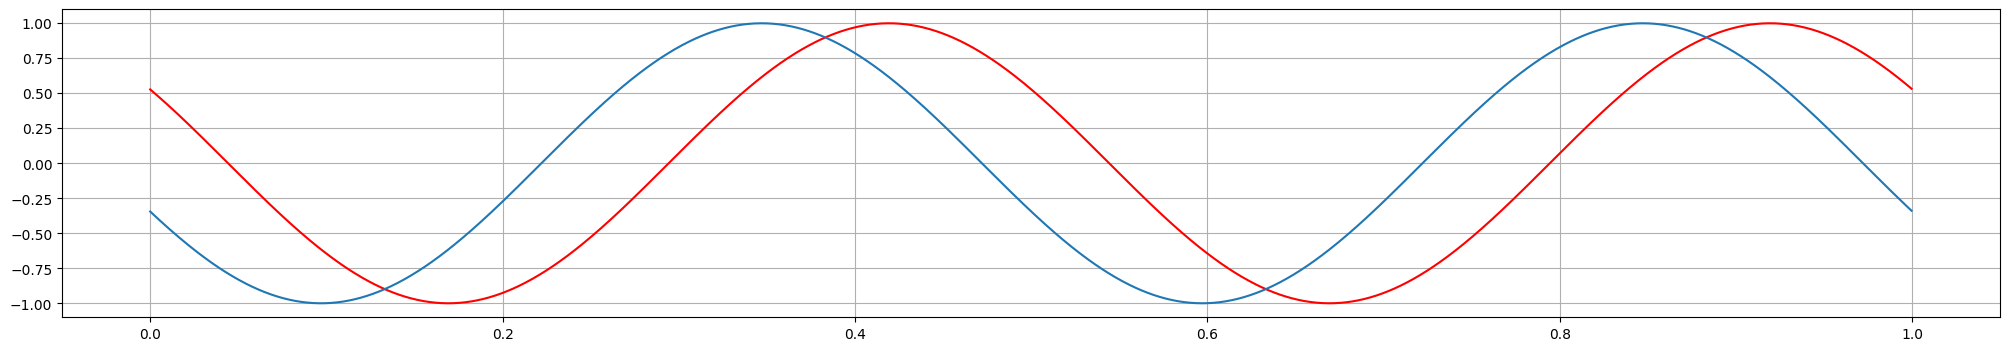

Vx[24] = 75.36


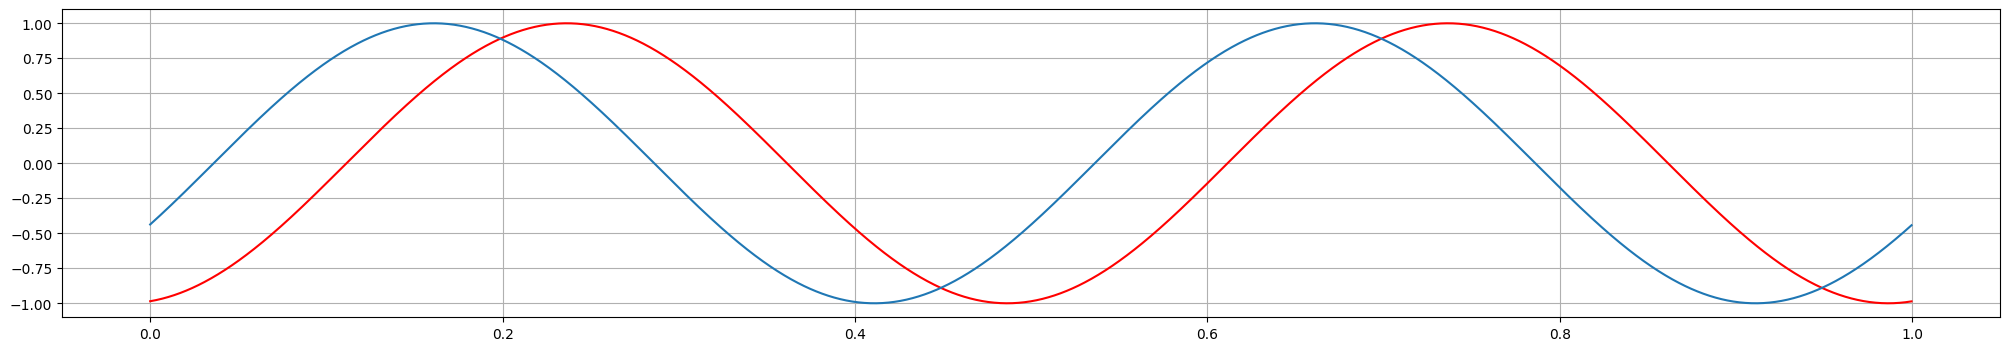

Vx[25] = 78.5


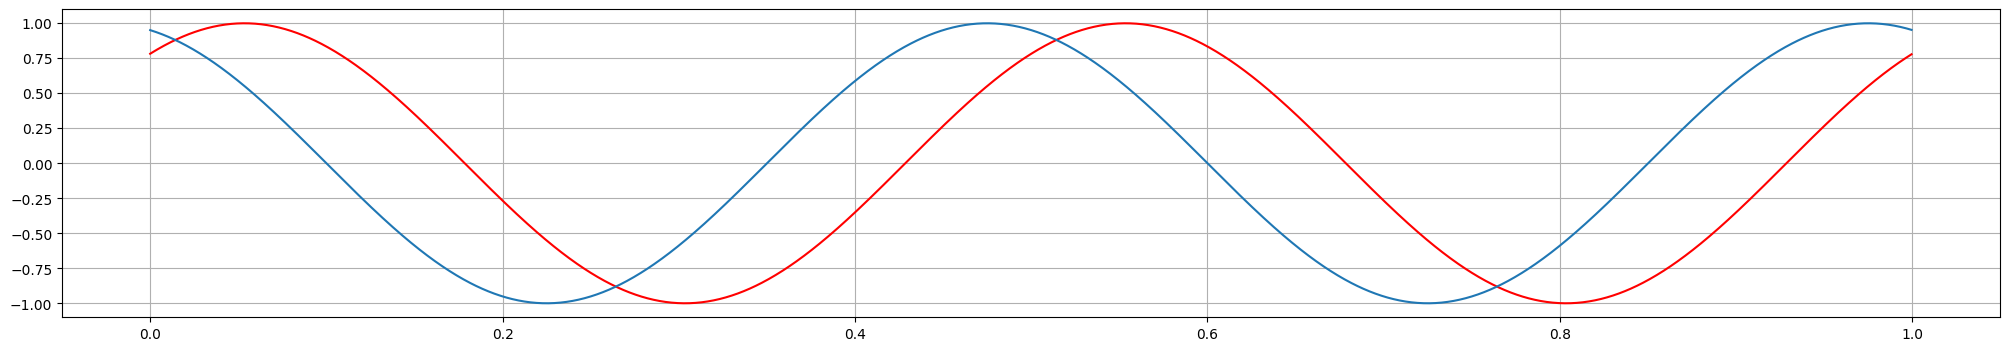

Vx[26] = 81.64


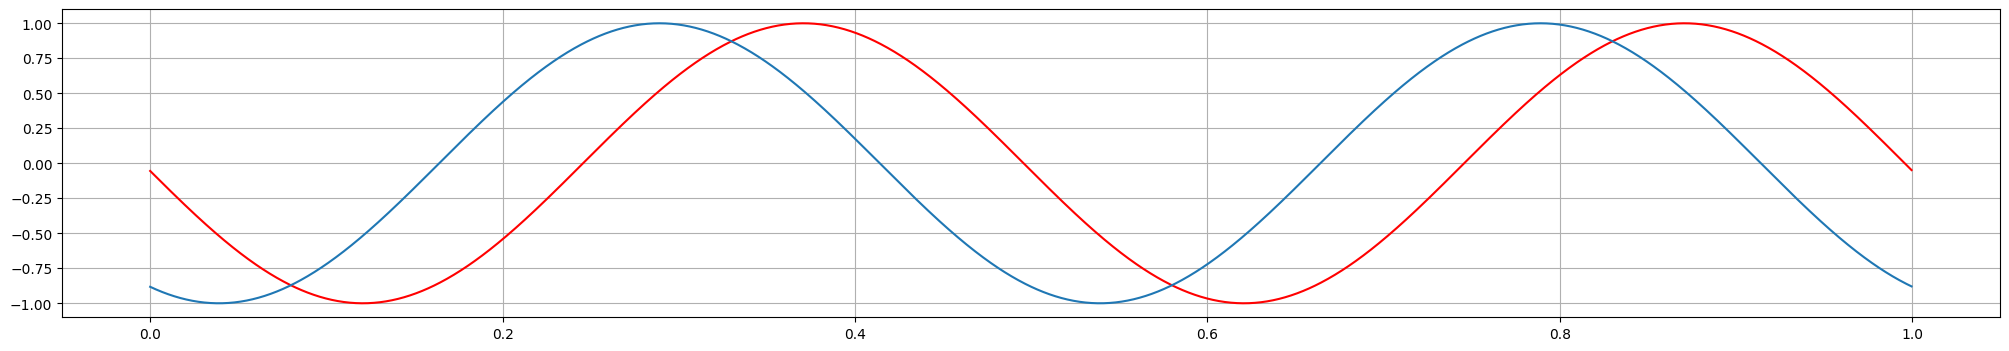

Vx[27] = 84.78


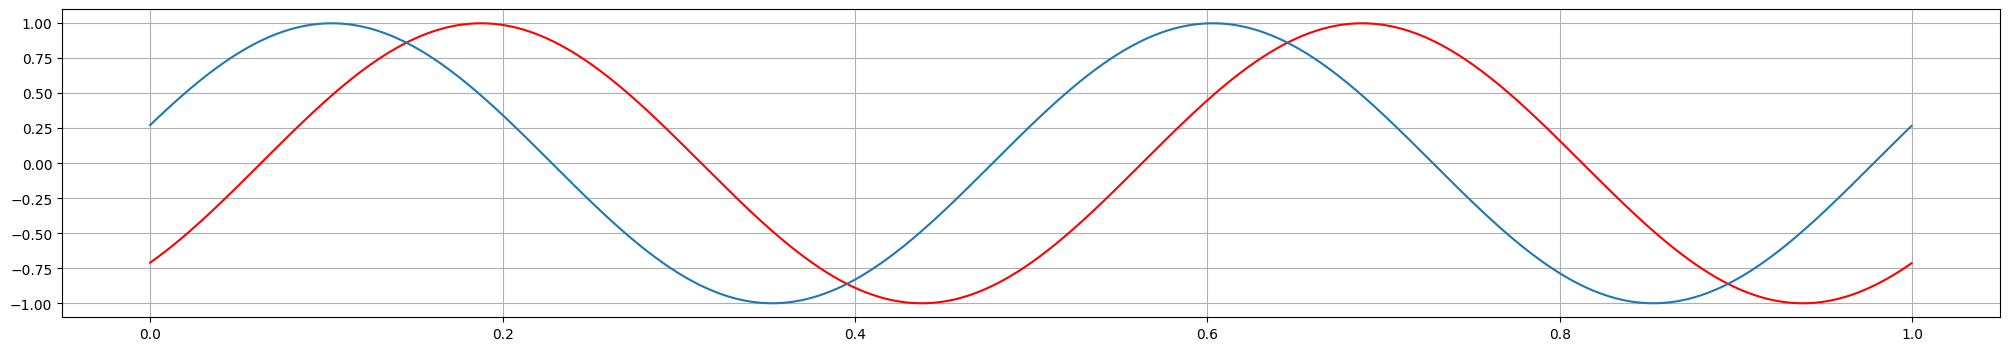

Vx[28] = 87.92


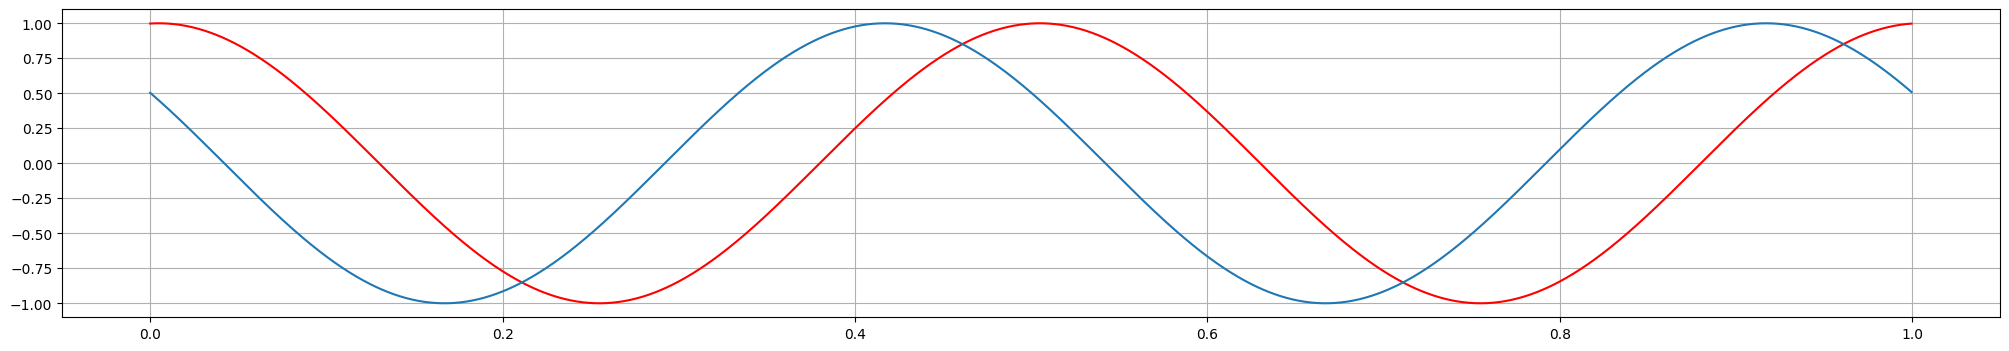

Vx[29] = 91.06


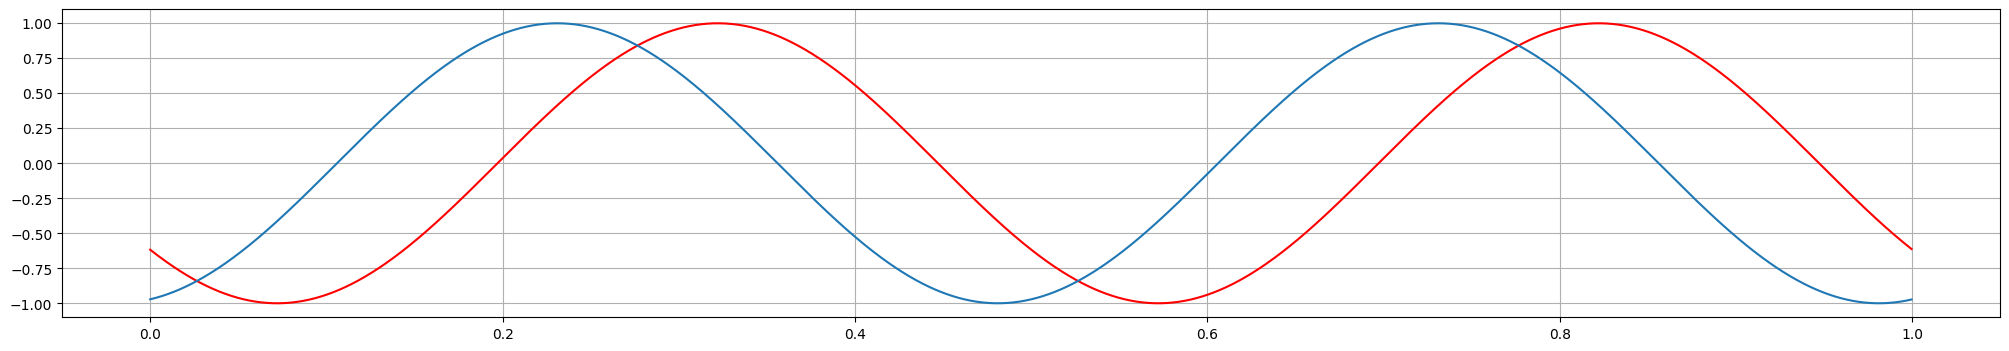

Vx[30] = 94.2


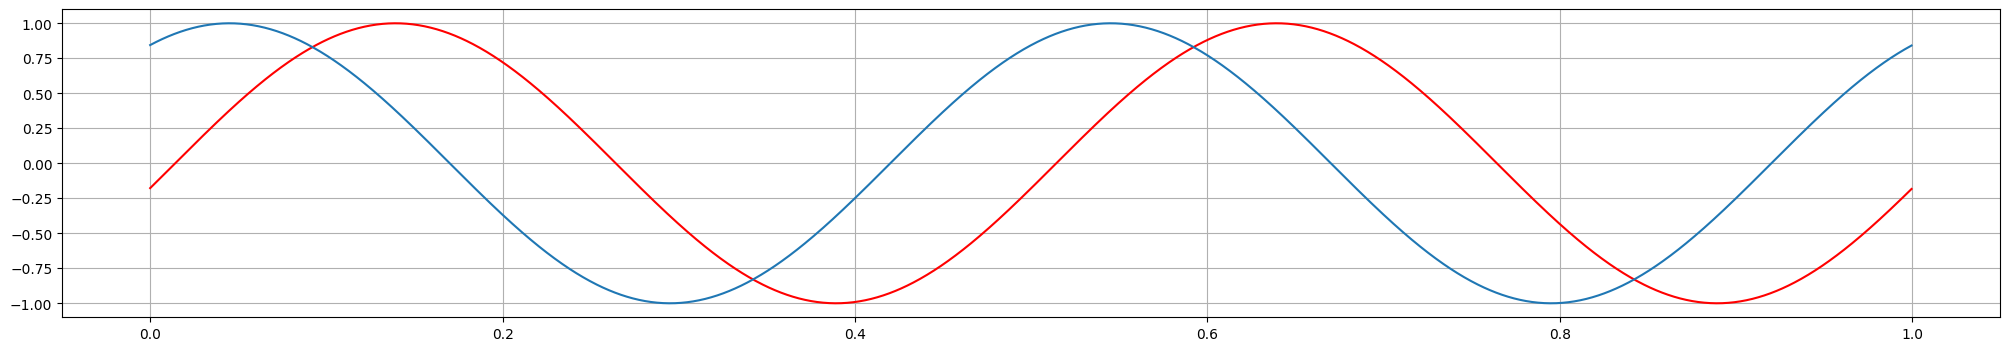

Vx[31] = 97.34


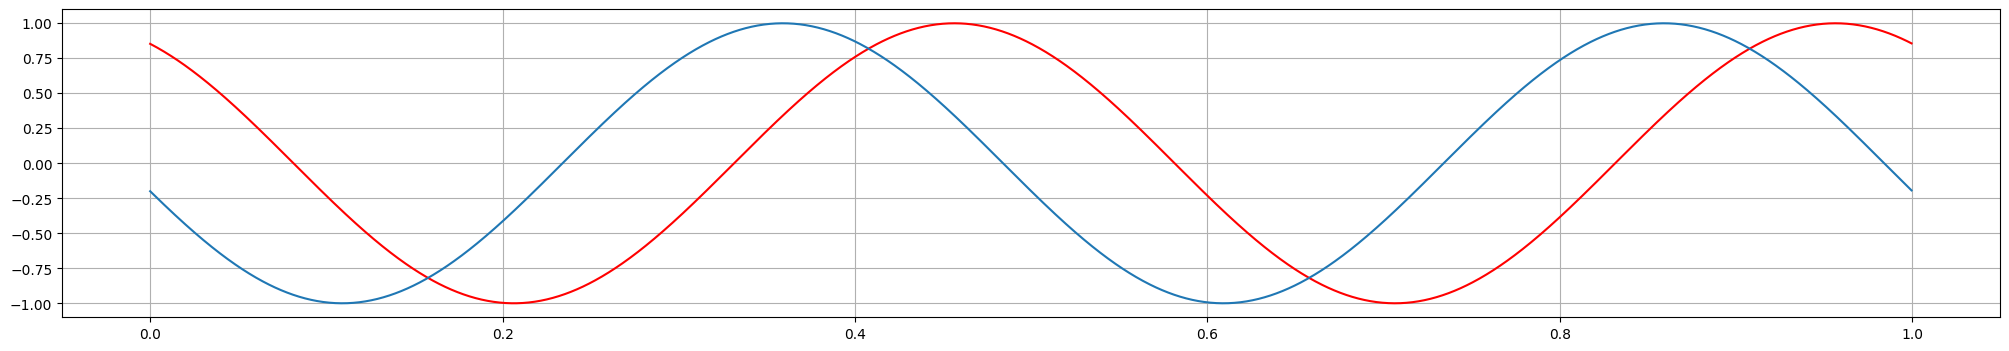

Vx[32] = 100.48


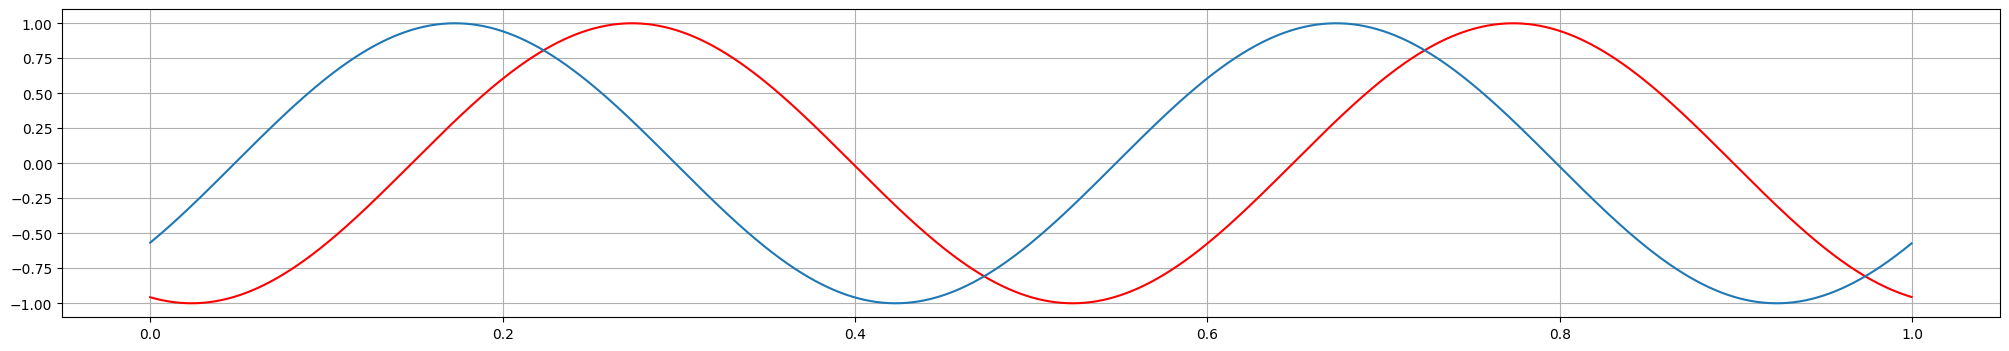

Vx[33] = 103.62


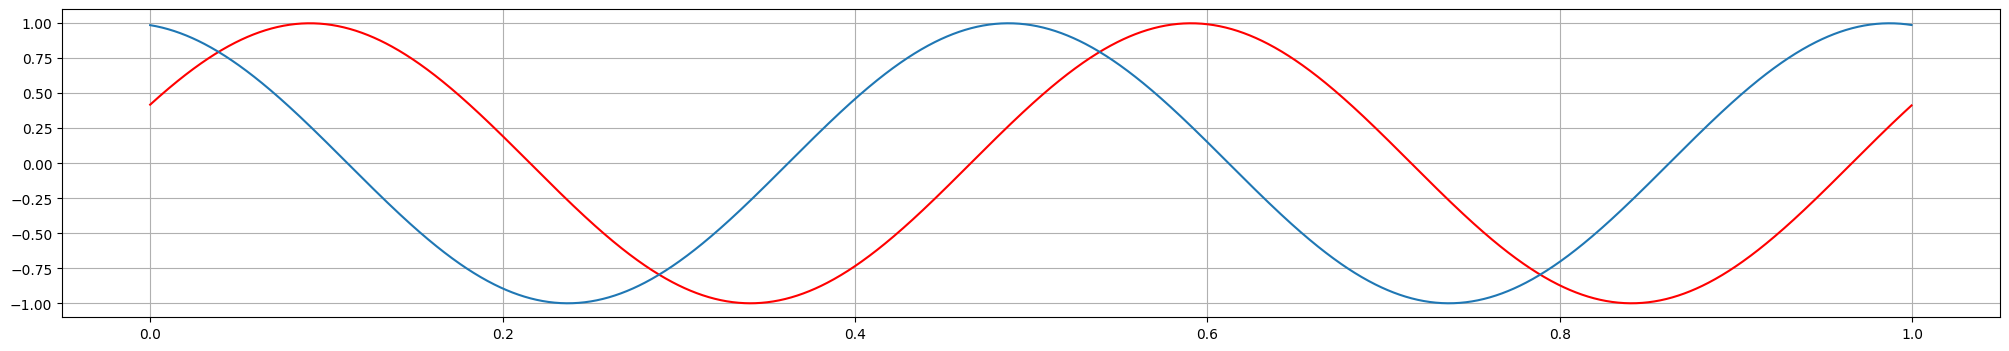

Vx[34] = 106.76


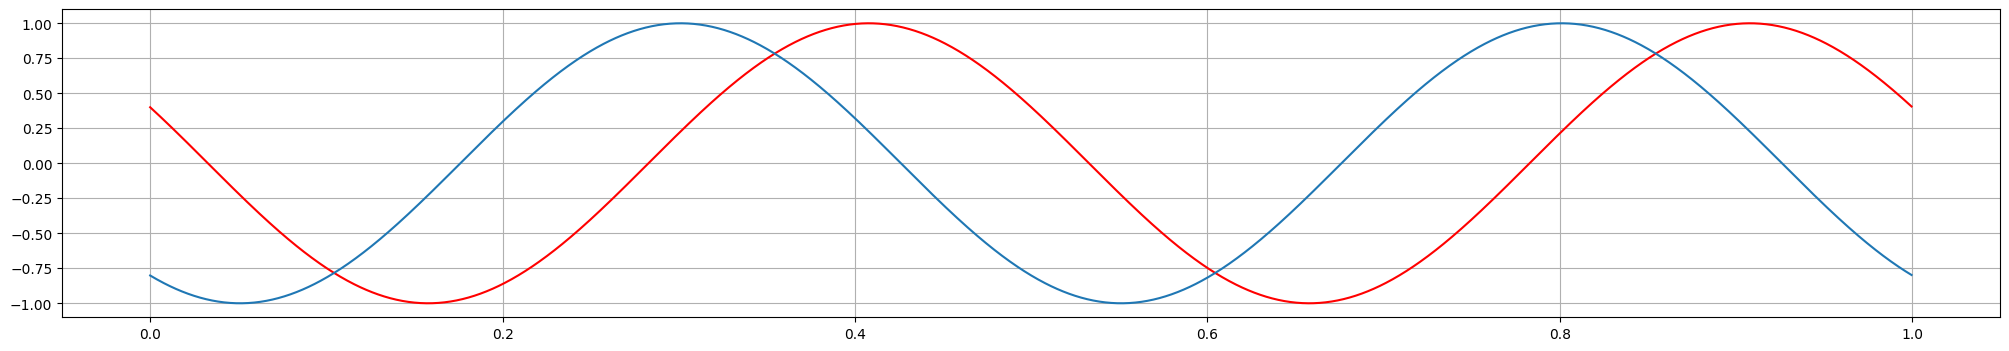

Vx[35] = 109.9


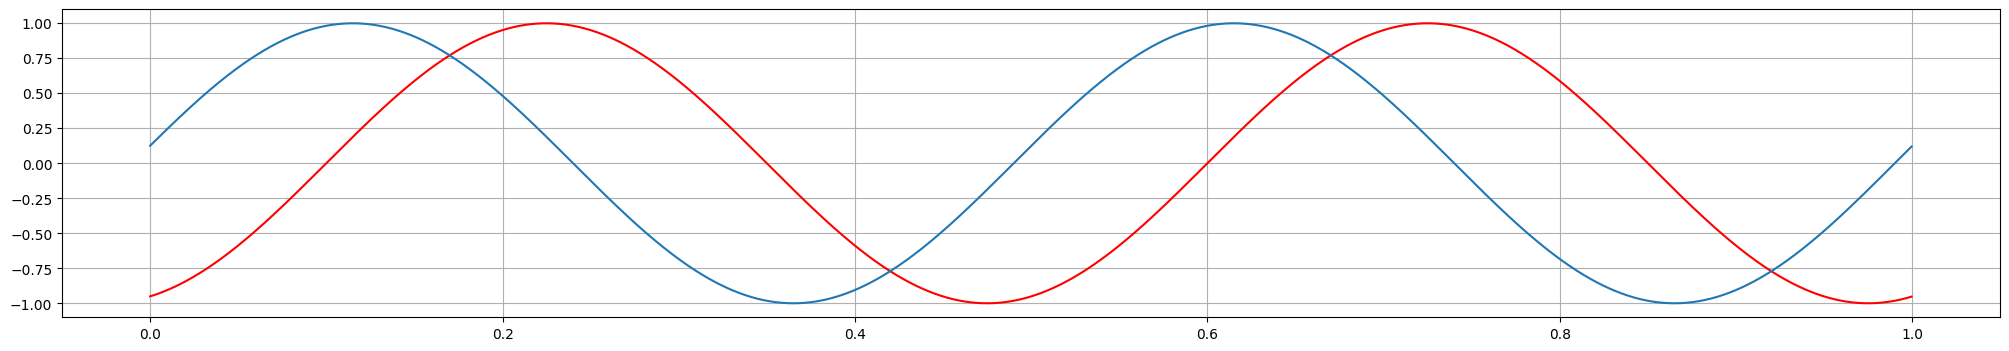

Vx[36] = 113.04


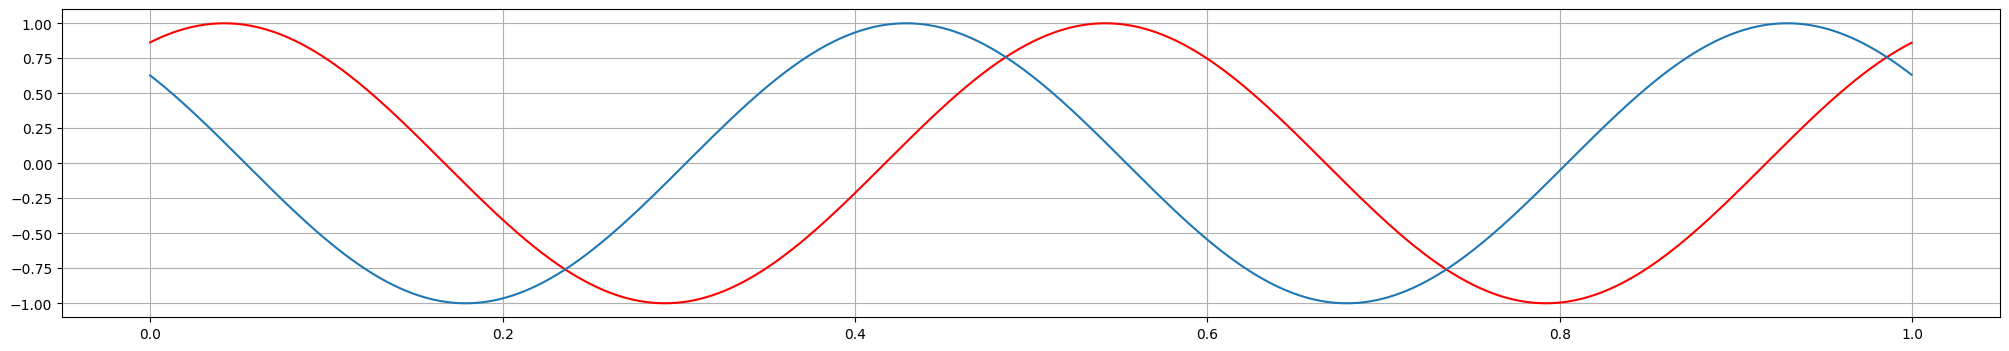

Vx[37] = 116.18


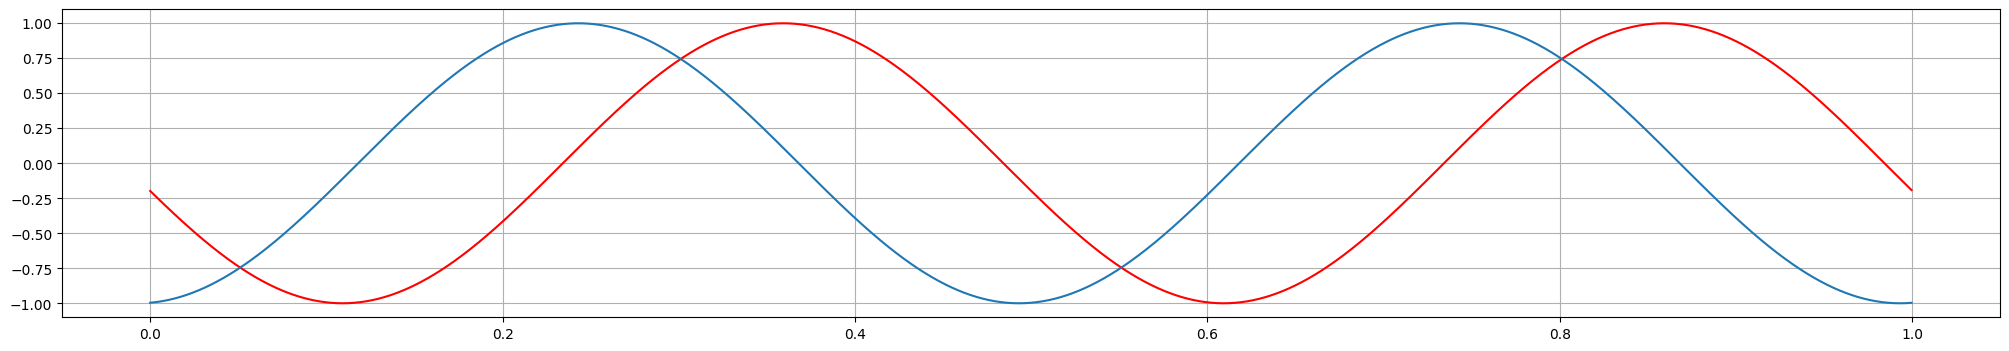

Vx[38] = 119.32000000000001


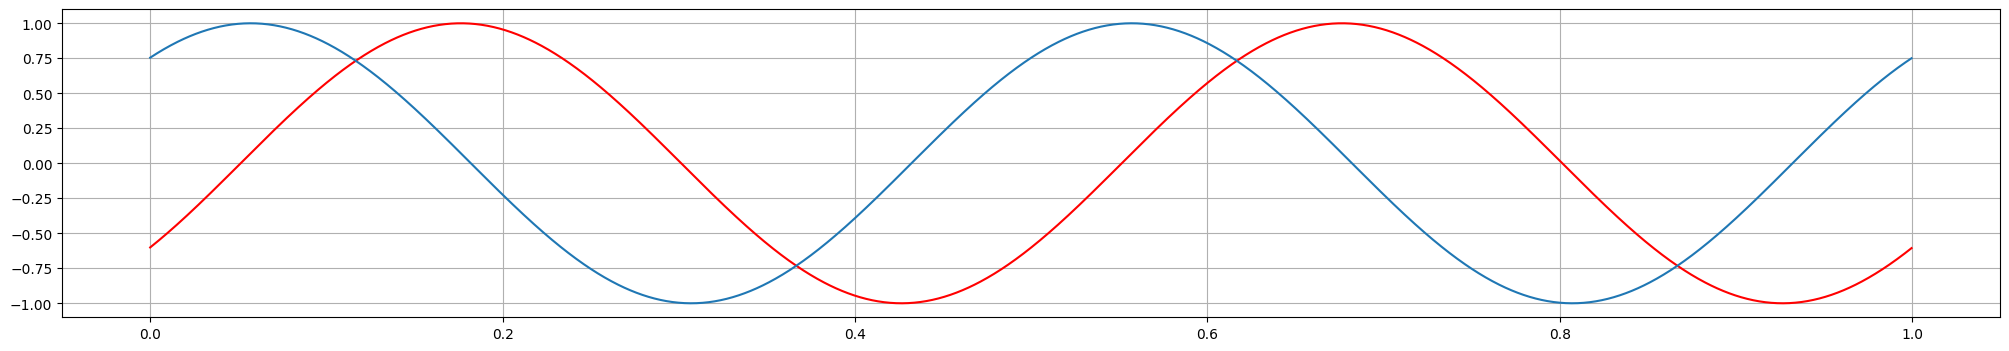

Vx[39] = 122.46000000000001


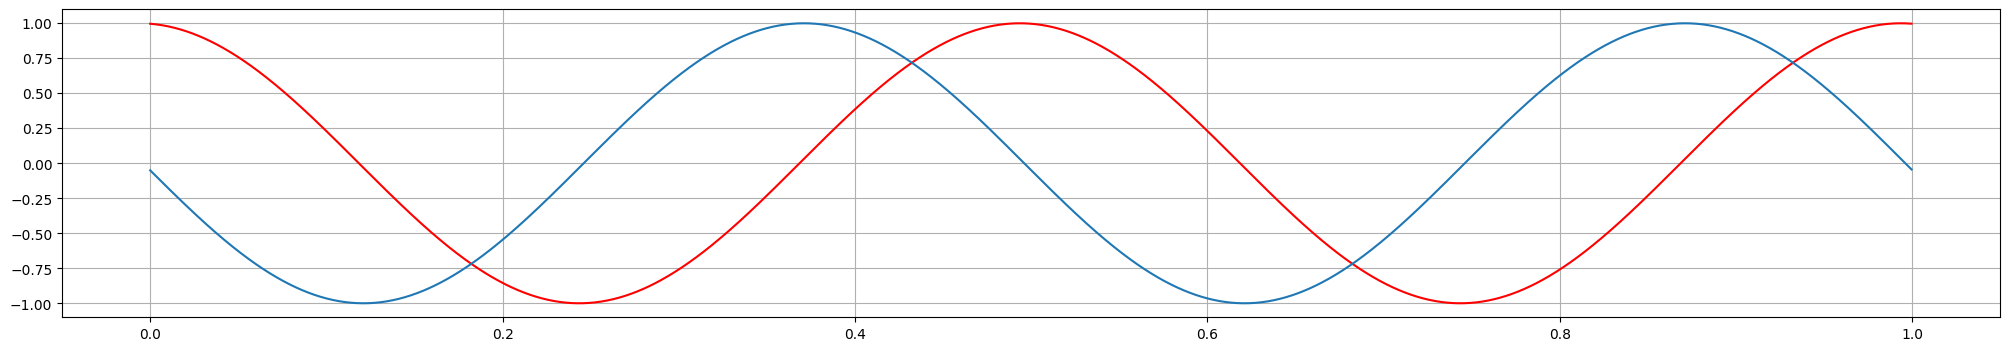

Vx[40] = 125.60000000000001


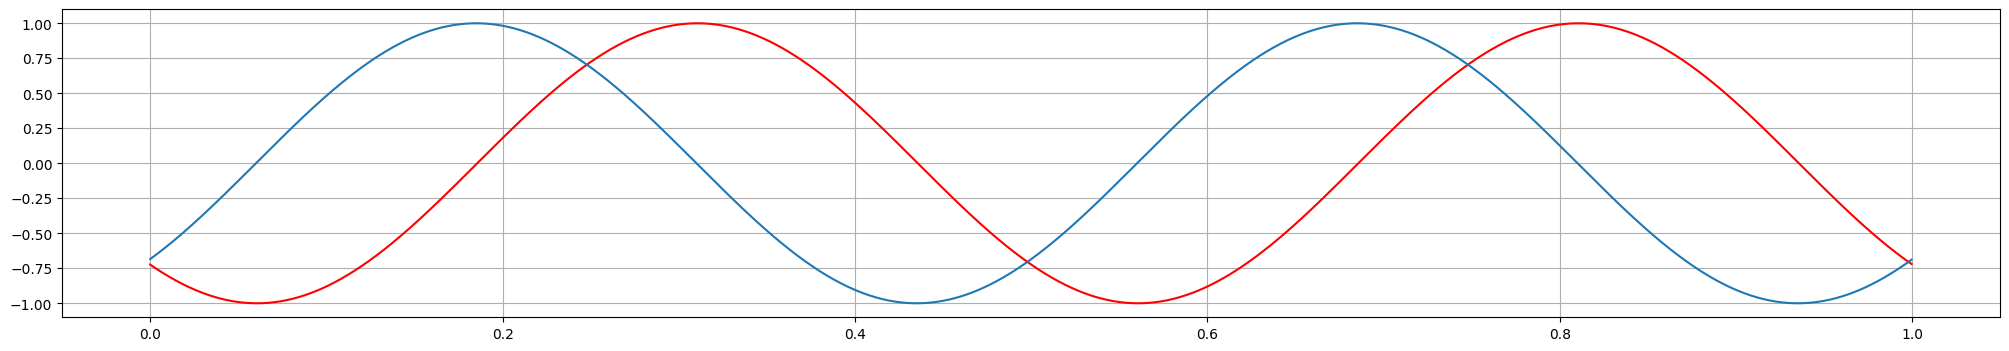

Vx[41] = 128.74


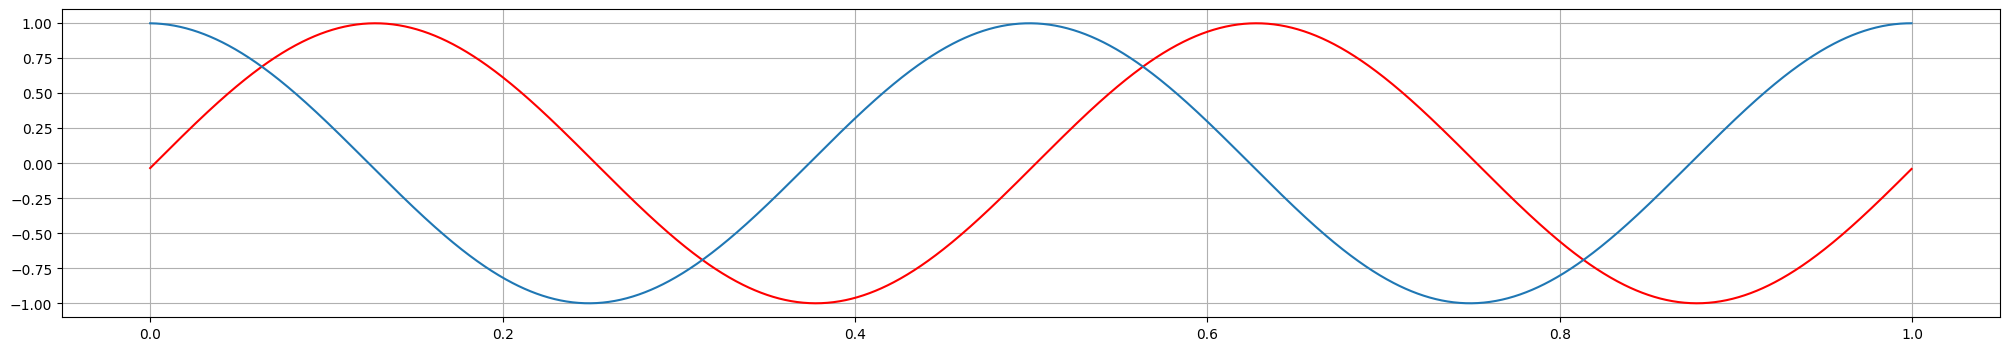

Vx[42] = 131.88


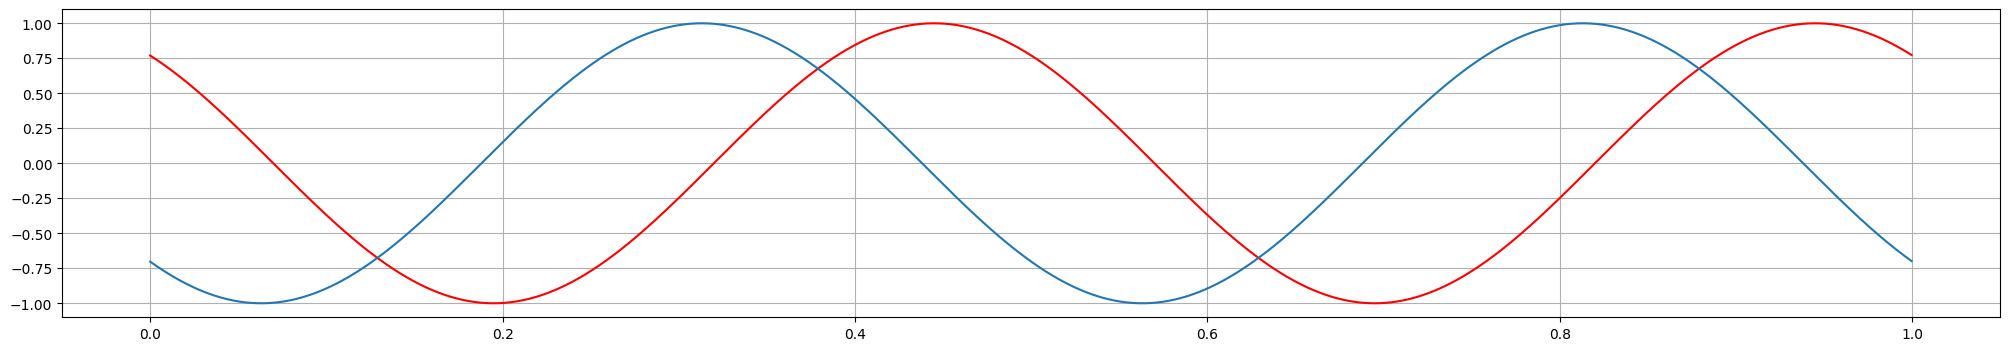

Vx[43] = 135.02


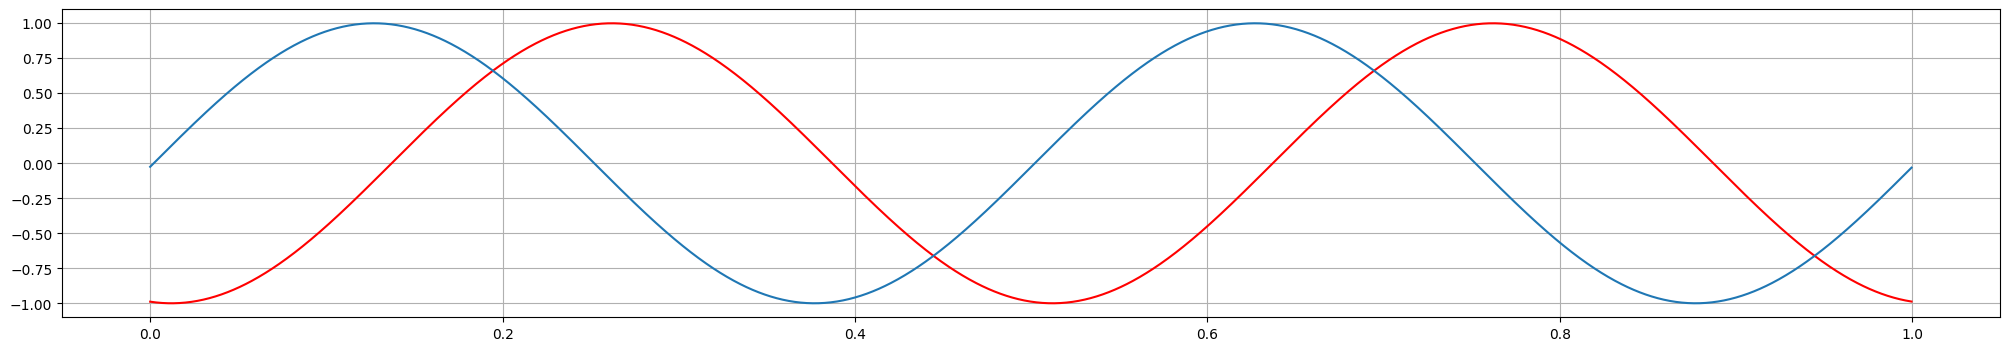

Vx[44] = 138.16


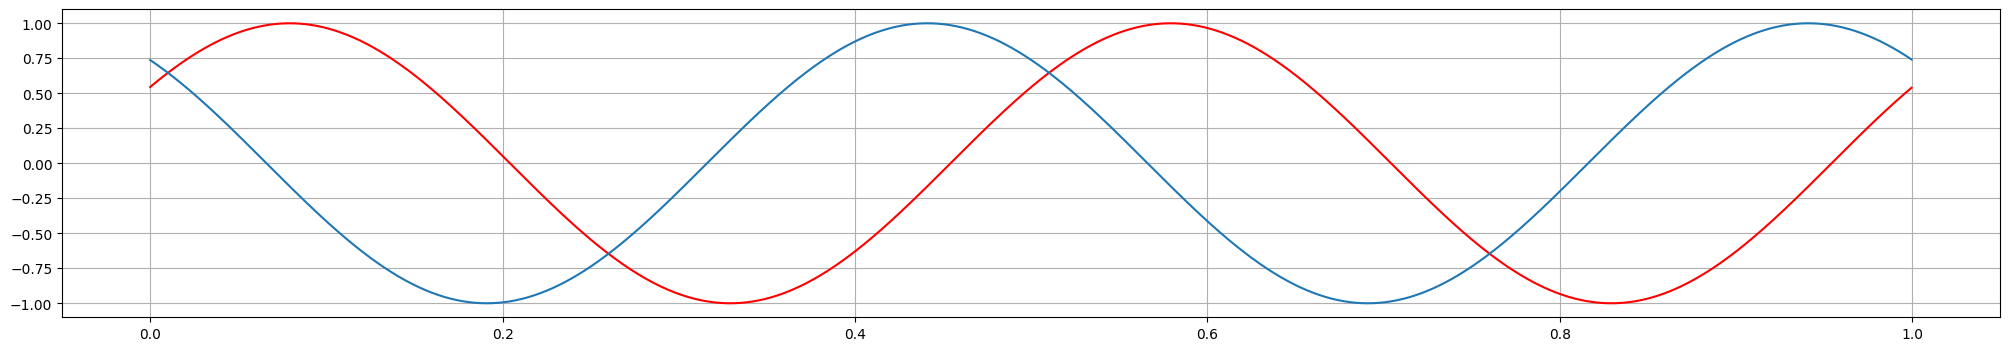

Vx[45] = 141.3


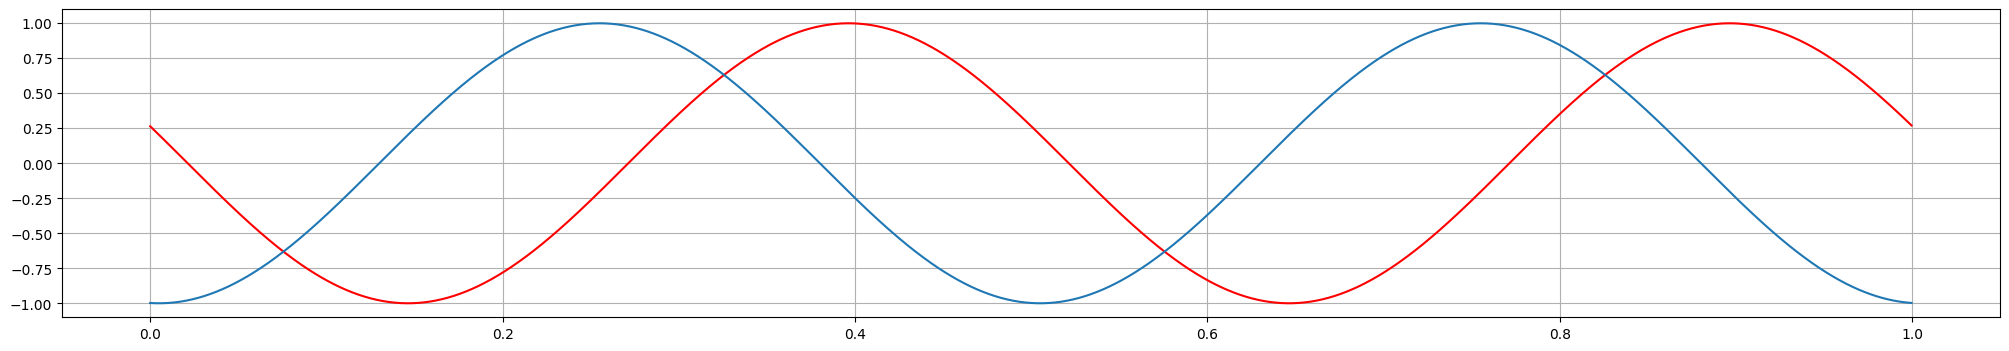

Vx[46] = 144.44


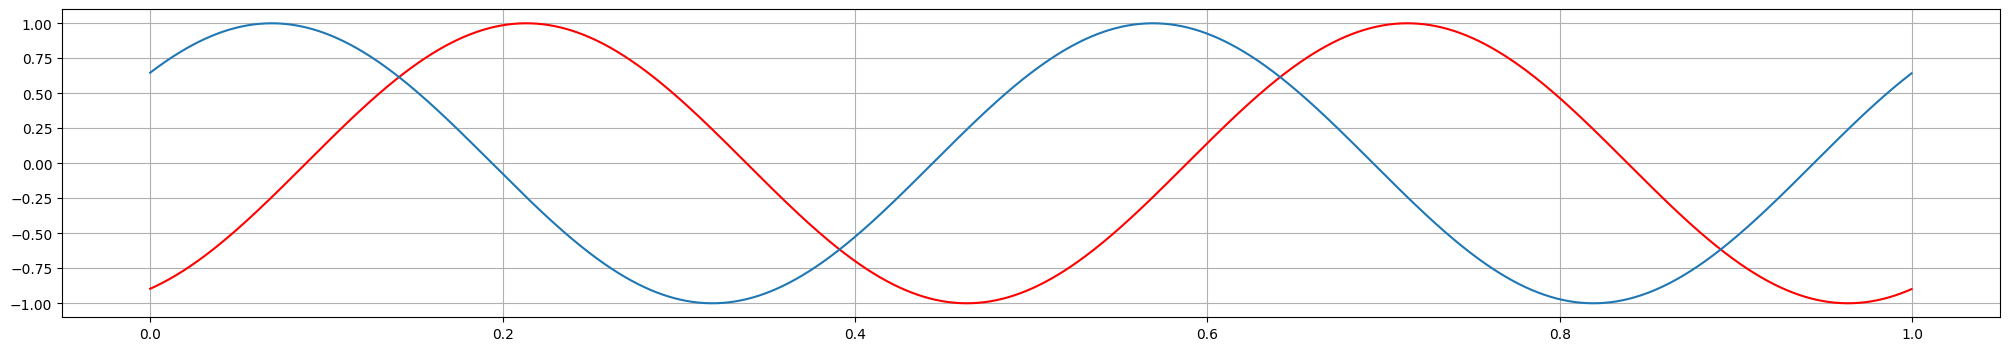

Vx[47] = 147.58


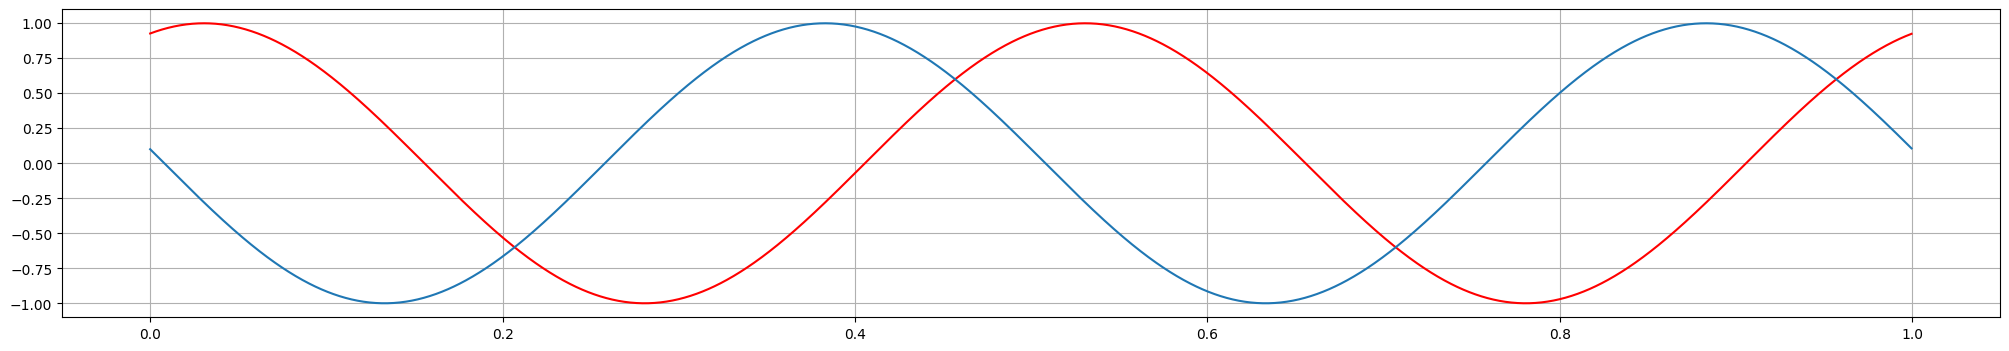

Vx[48] = 150.72


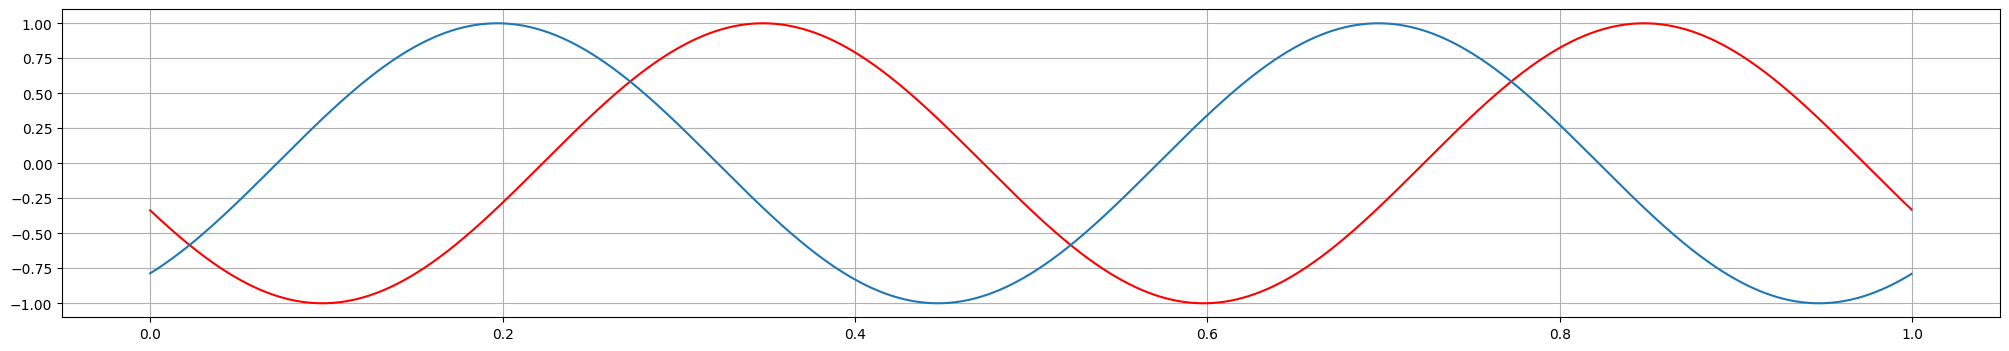

Vx[49] = 153.86


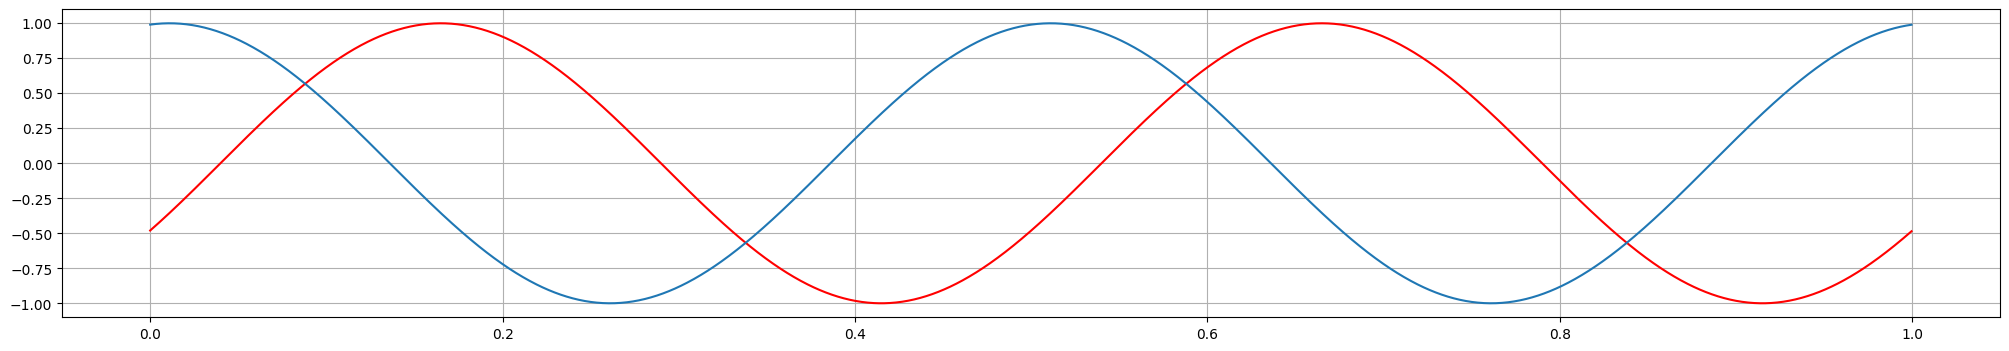

Vx[50] = 157.0


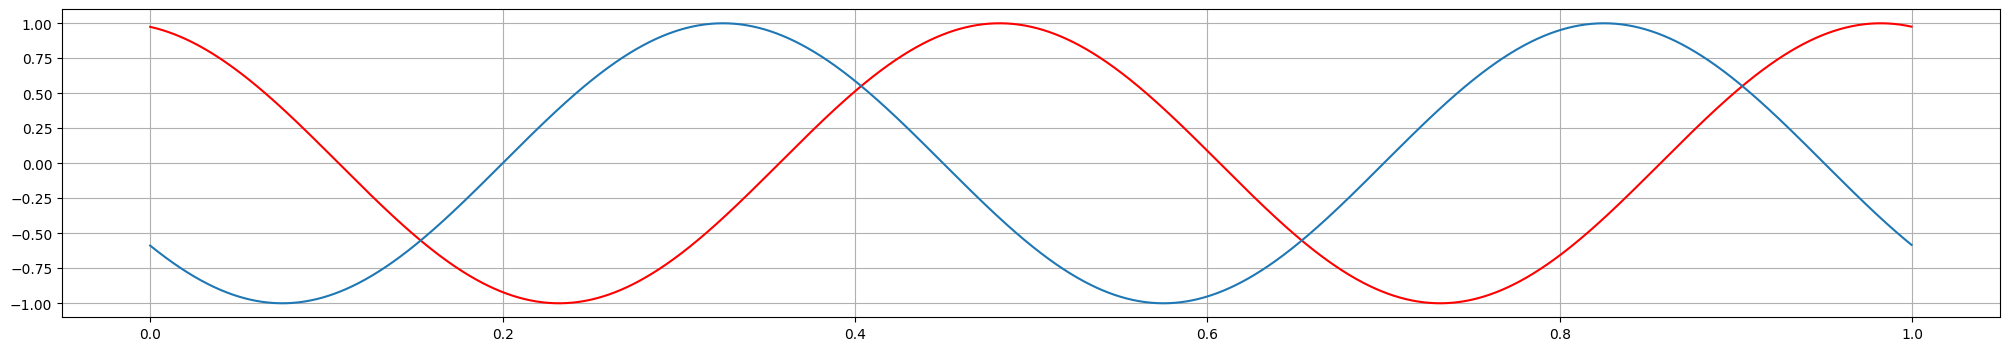

Vx[51] = 160.14000000000001


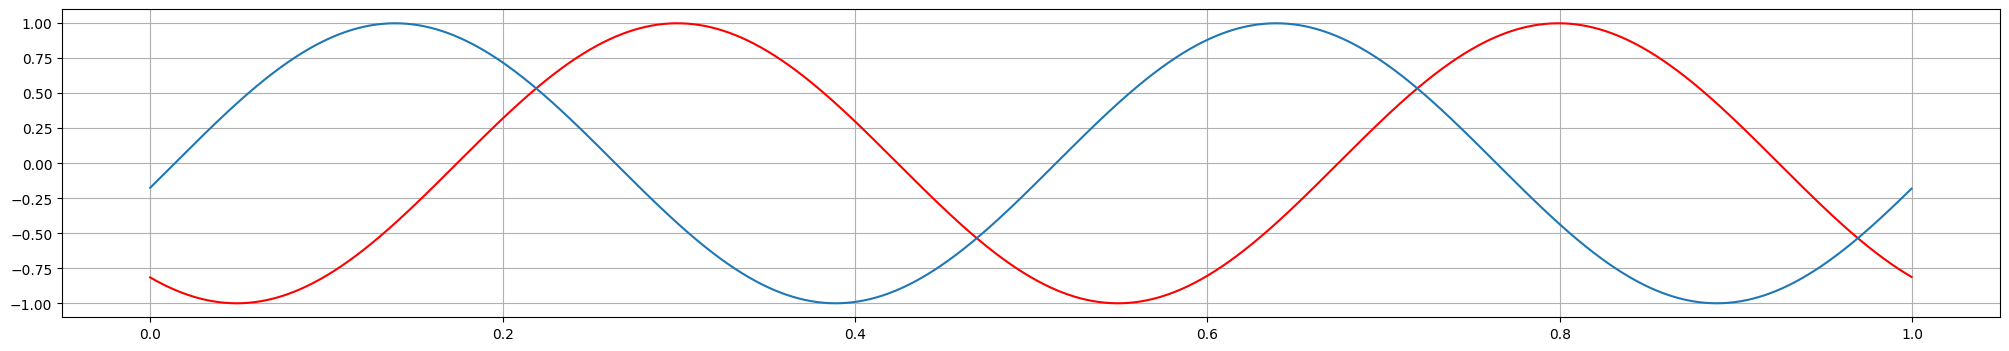

Vx[52] = 163.28


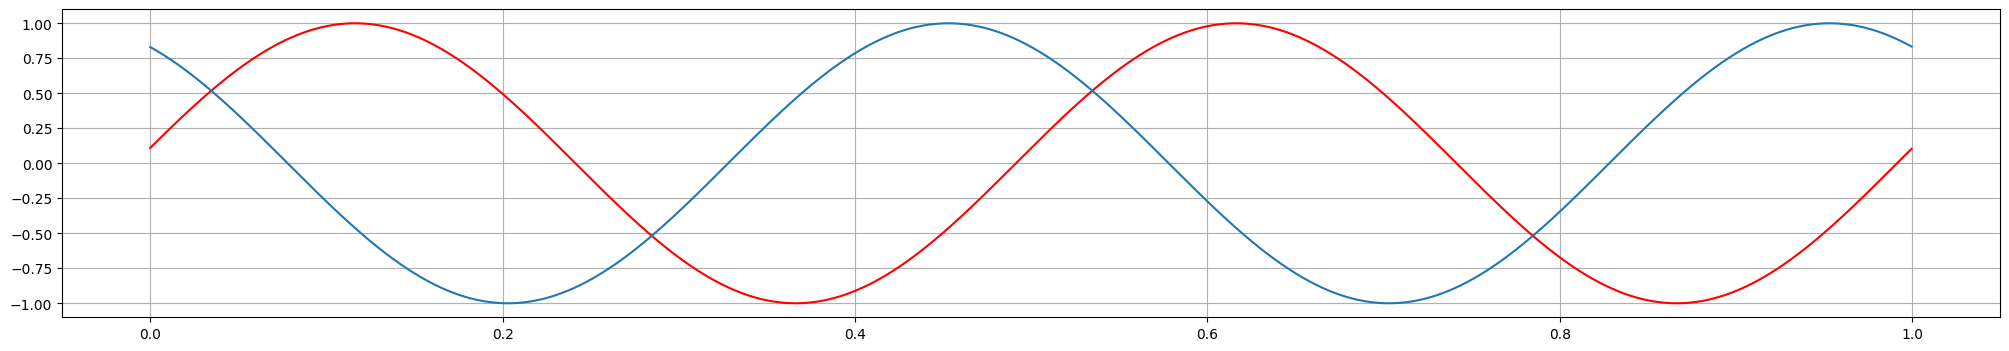

Vx[53] = 166.42000000000002


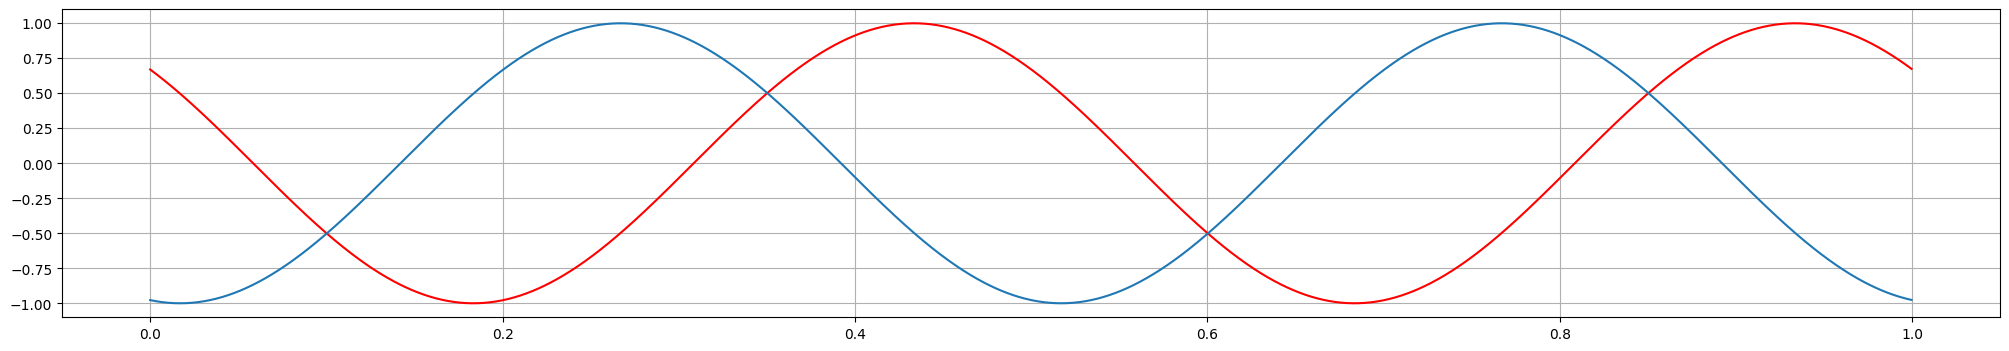

Vx[54] = 169.56


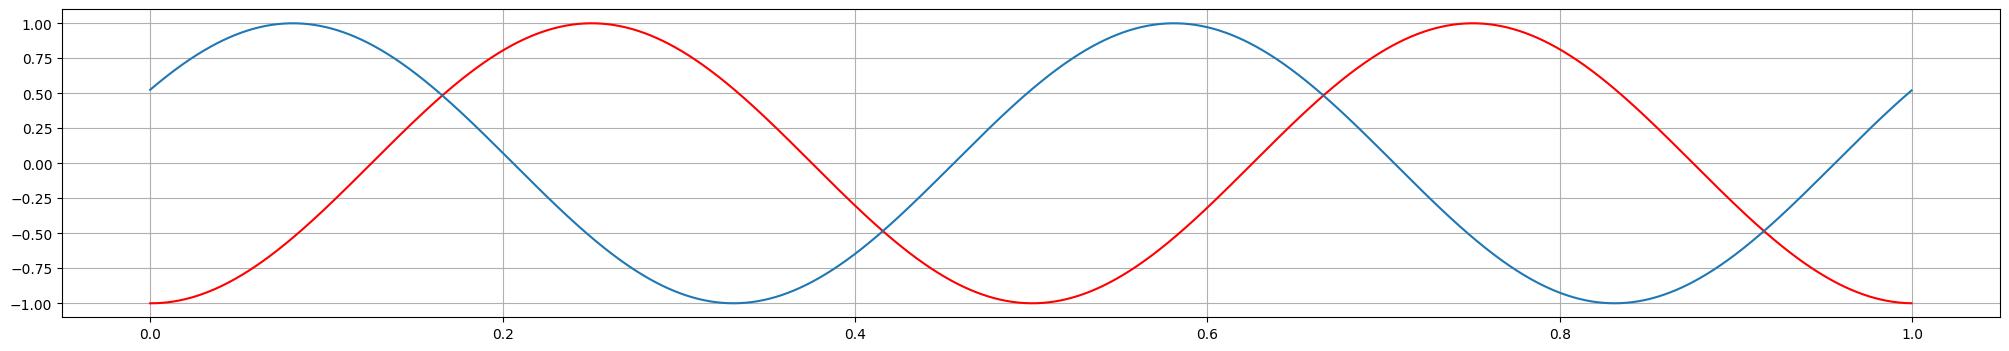

Vx[55] = 172.70000000000002


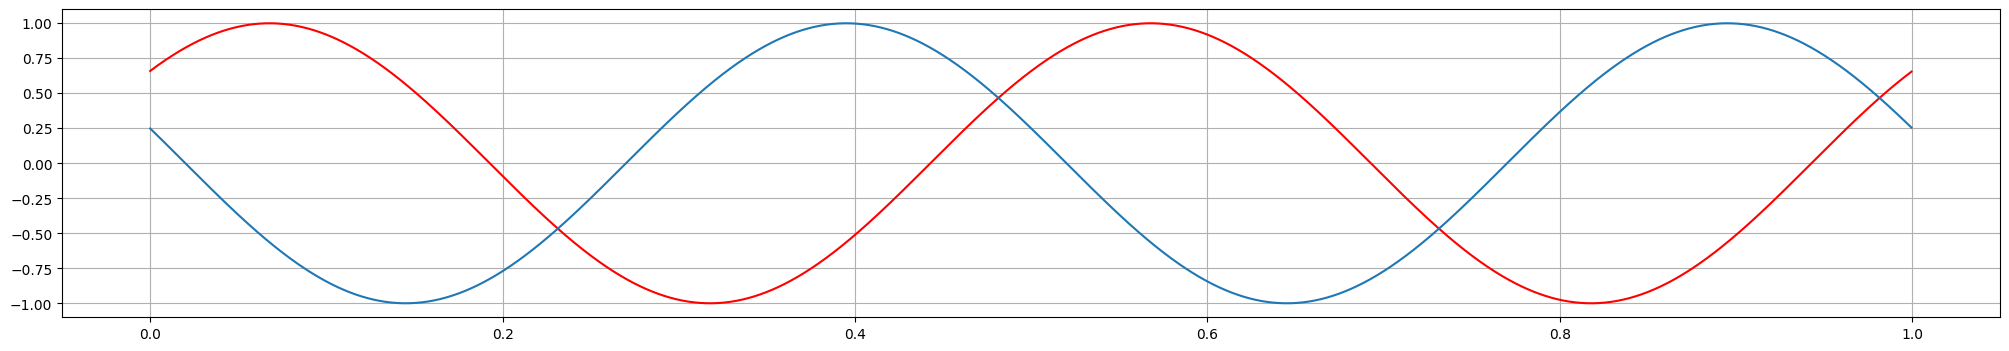

Vx[56] = 175.84


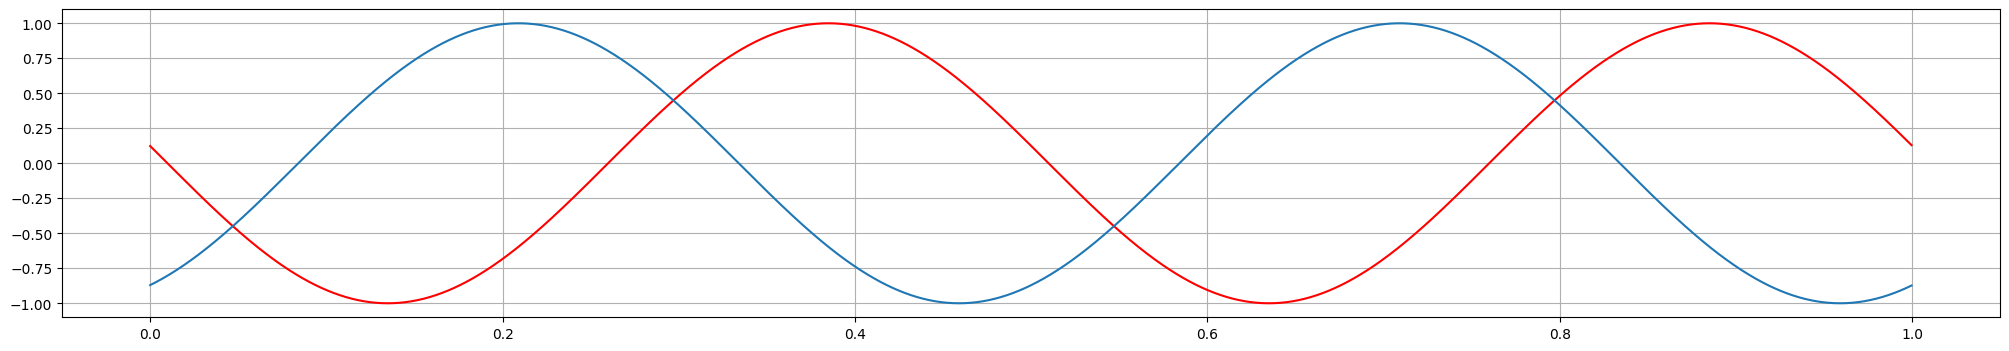

Vx[57] = 178.98000000000002


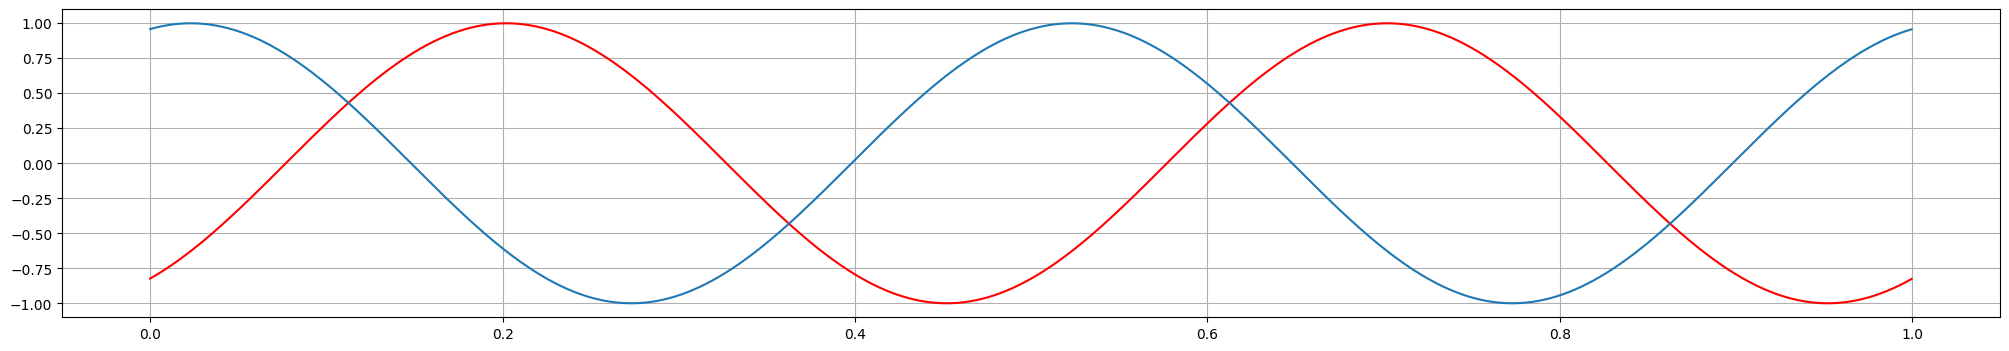

Vx[58] = 182.12


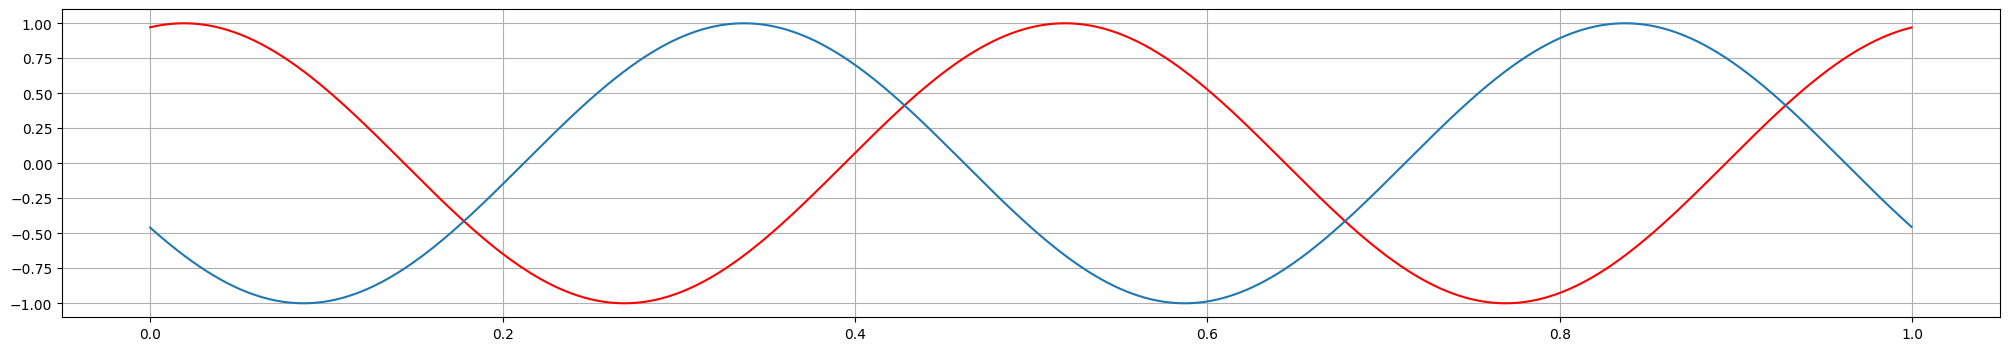

Vx[59] = 185.26000000000002


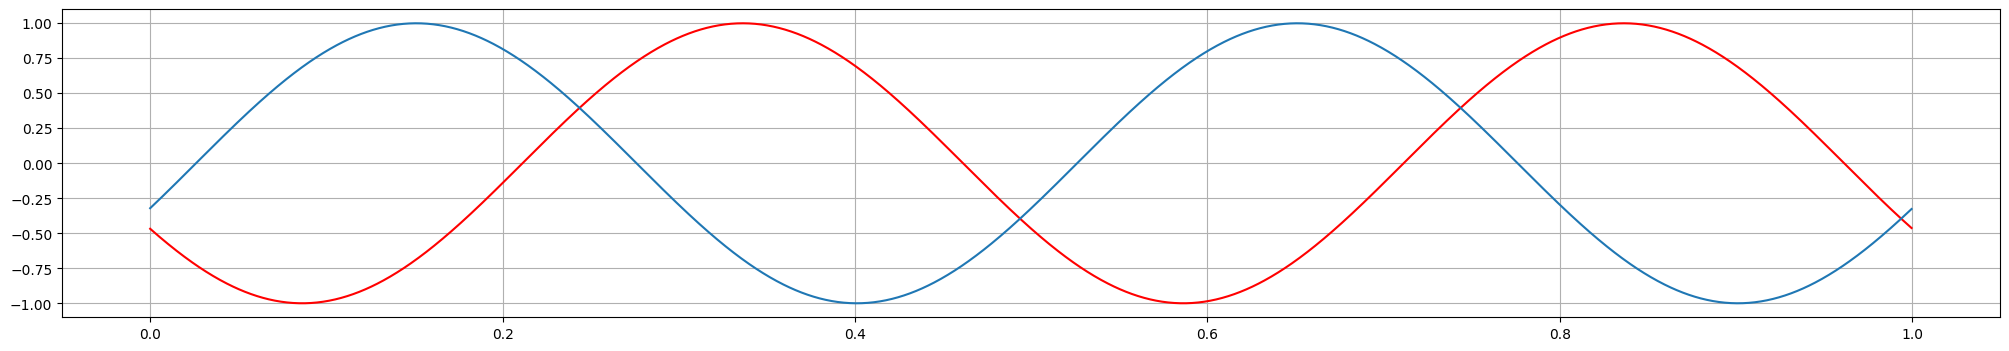

Vx[60] = 188.4


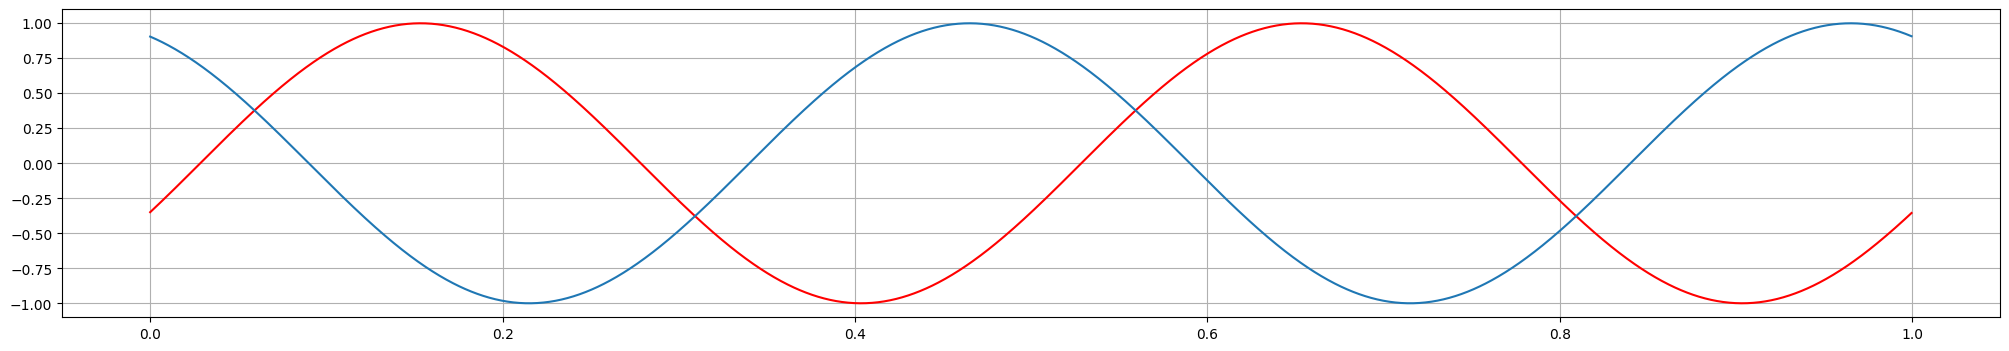

Vx[61] = 191.54000000000002


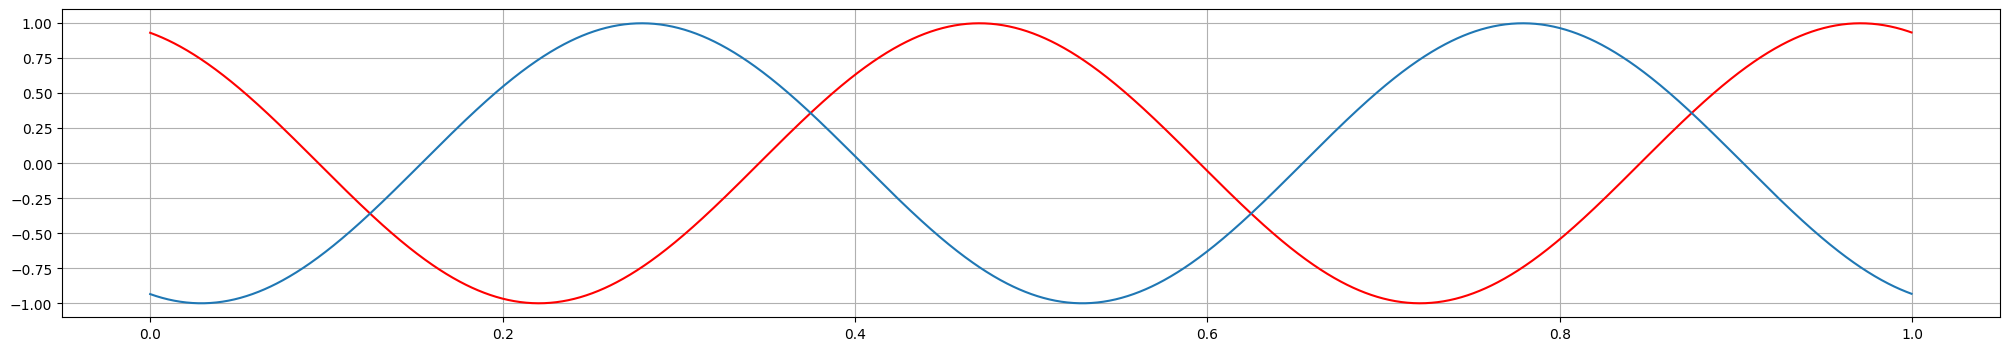

Vx[62] = 194.68


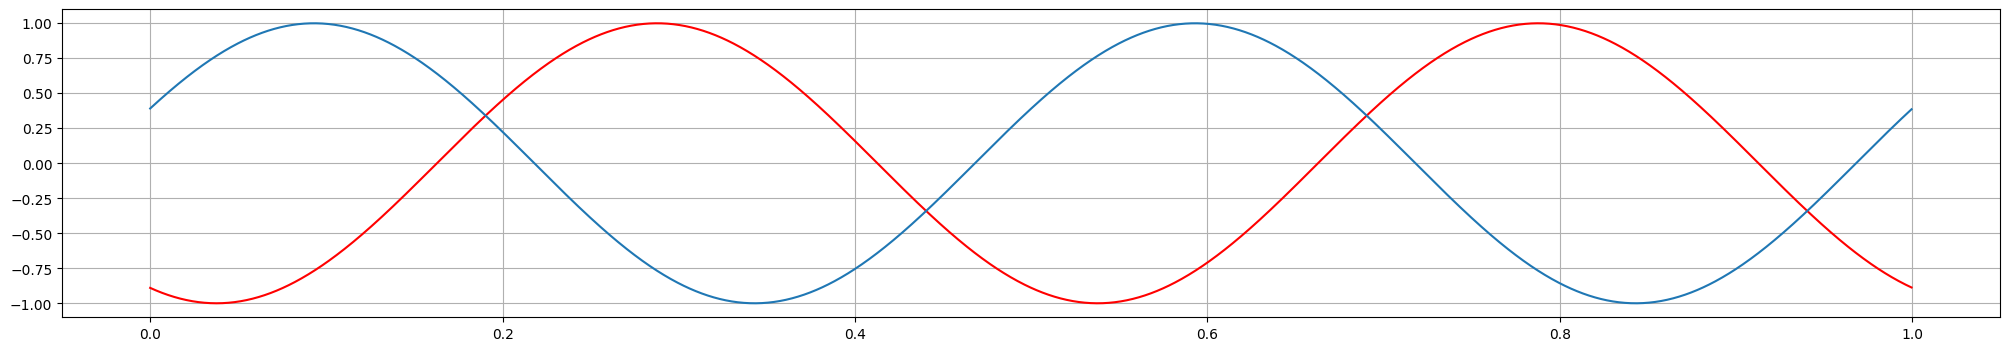

Vx[63] = 197.82000000000002


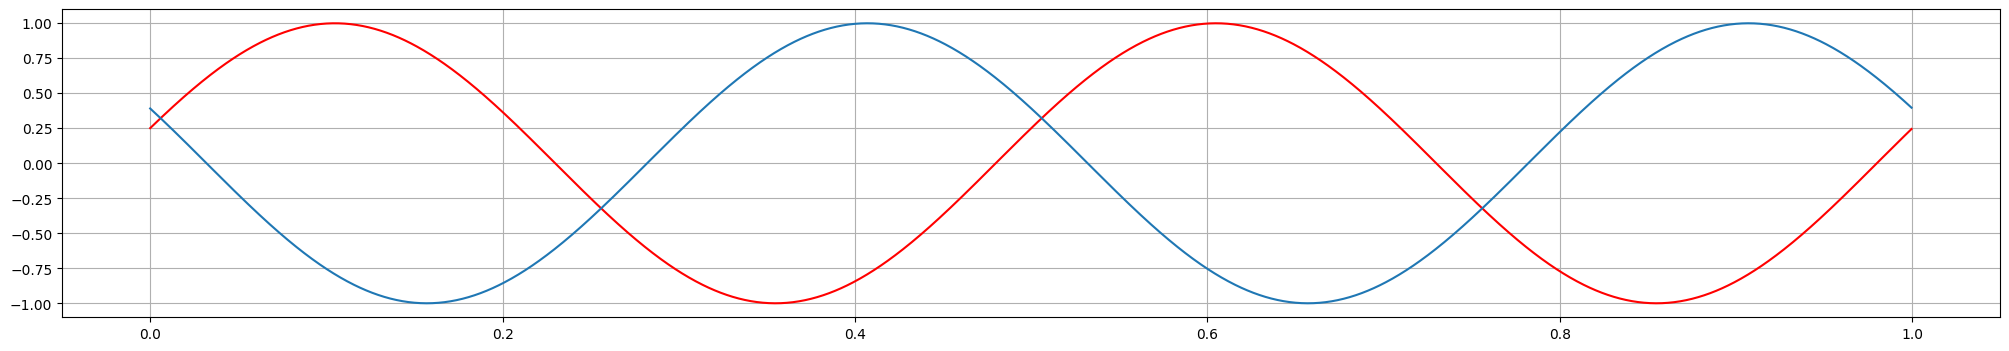

Vx[64] = 200.96


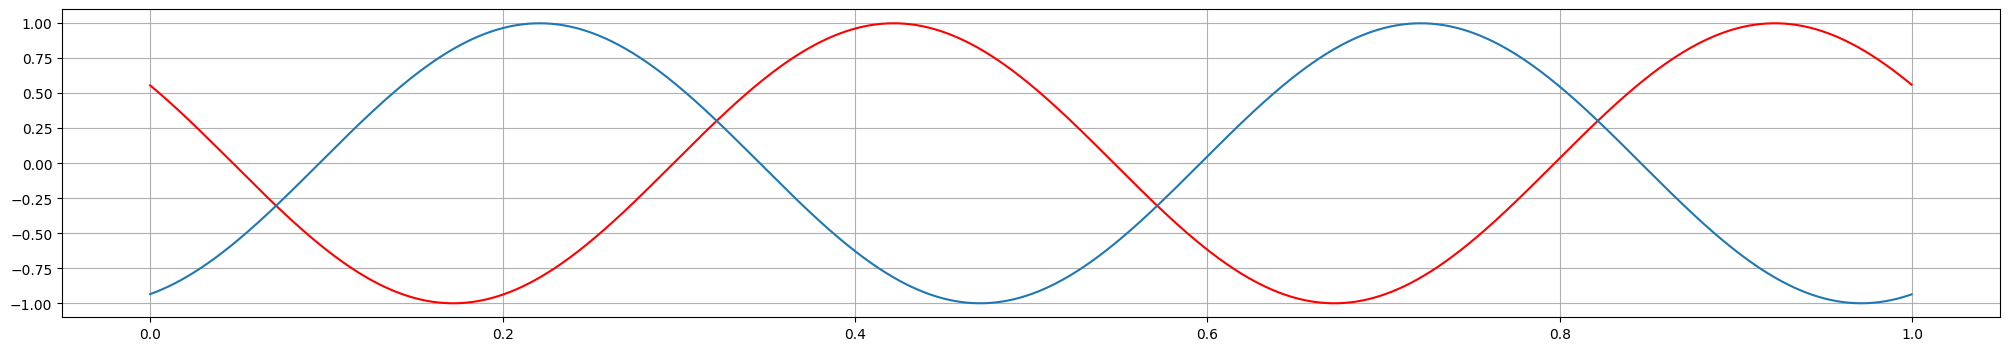

Vx[65] = 204.1


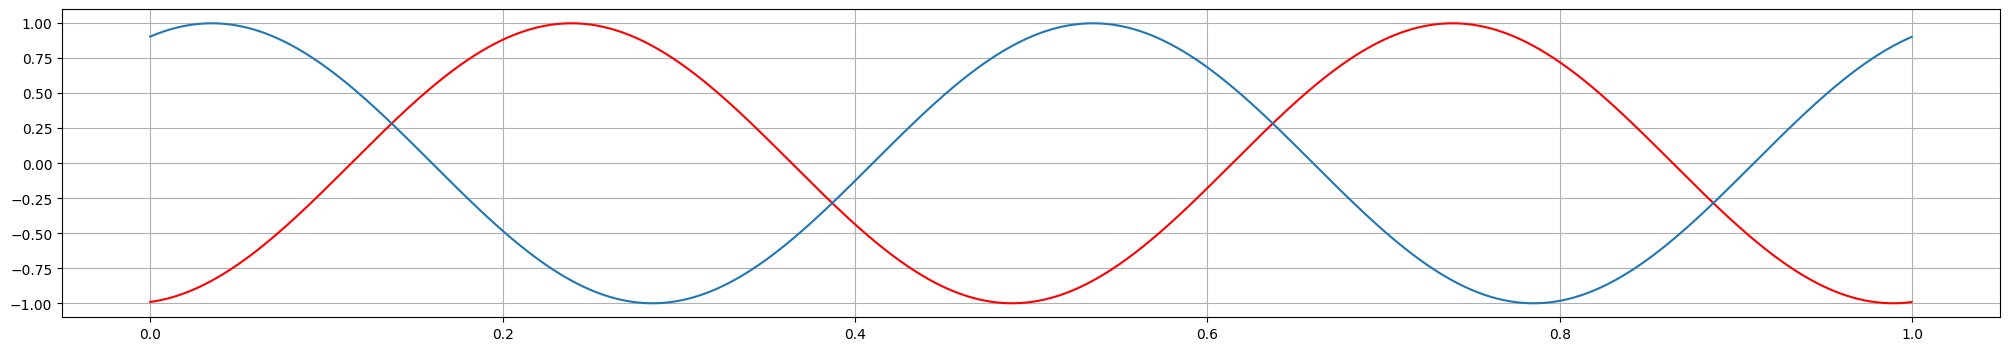

Vx[66] = 207.24


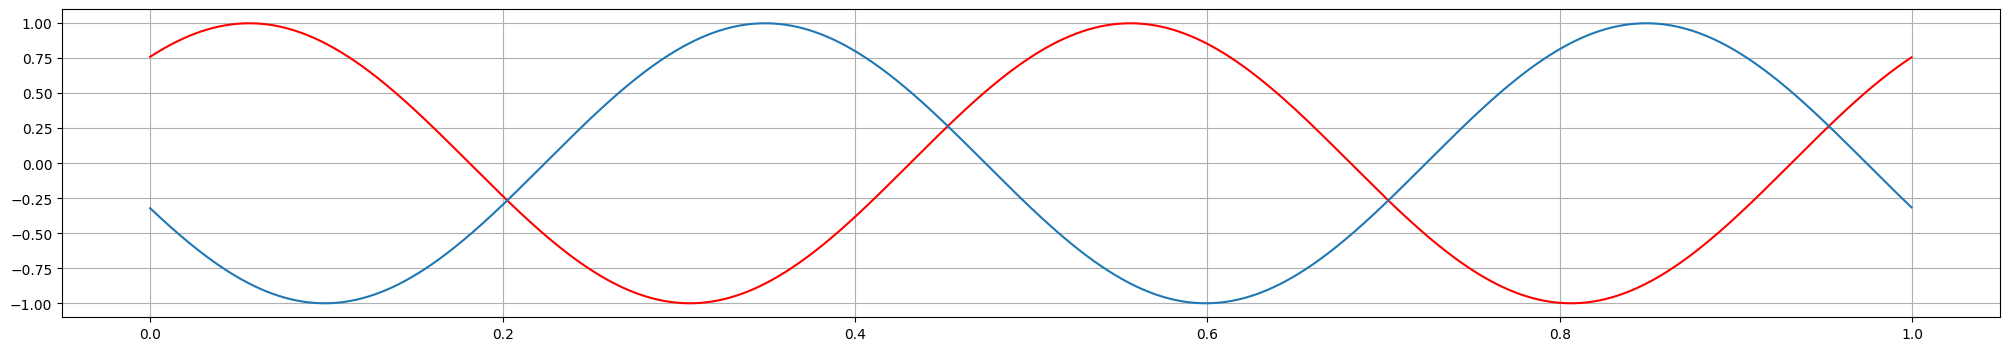

Vx[67] = 210.38


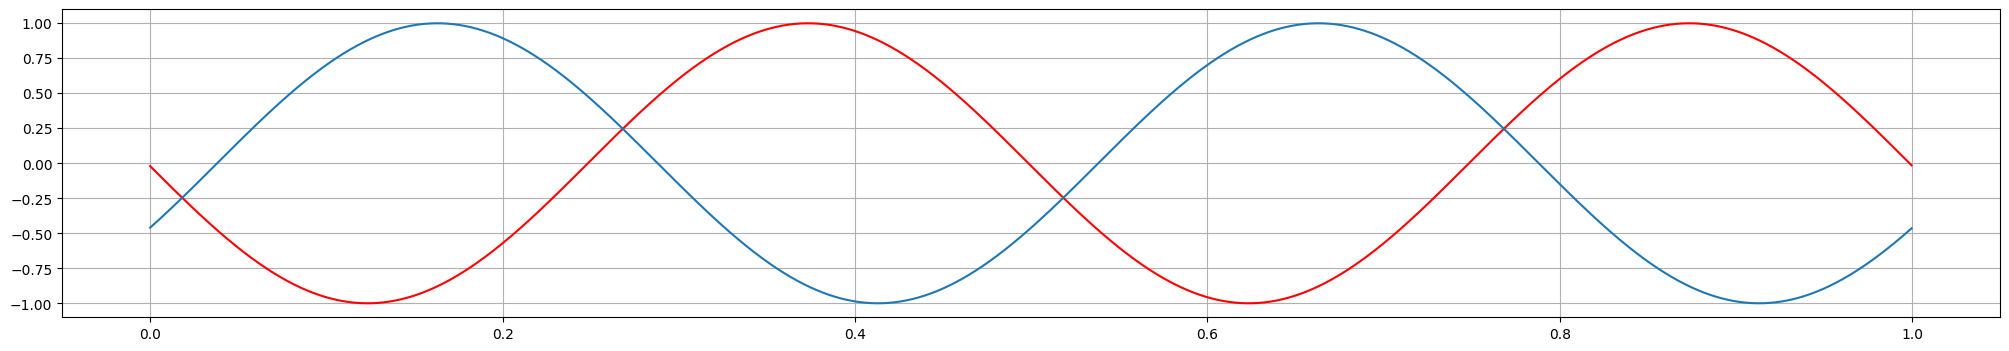

Vx[68] = 213.52


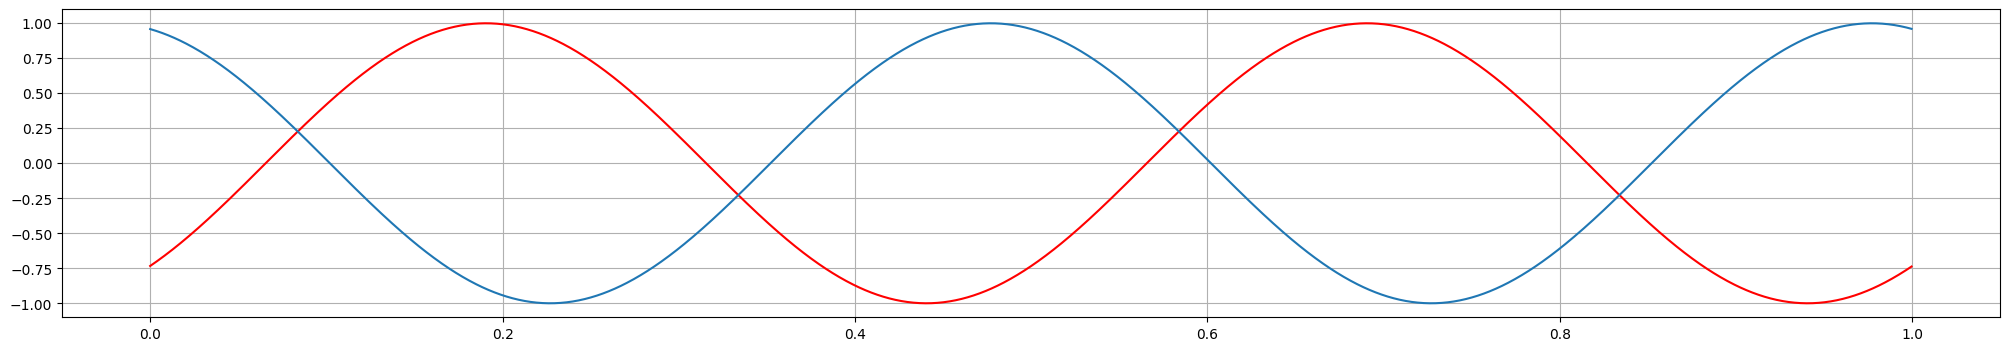

Vx[69] = 216.66


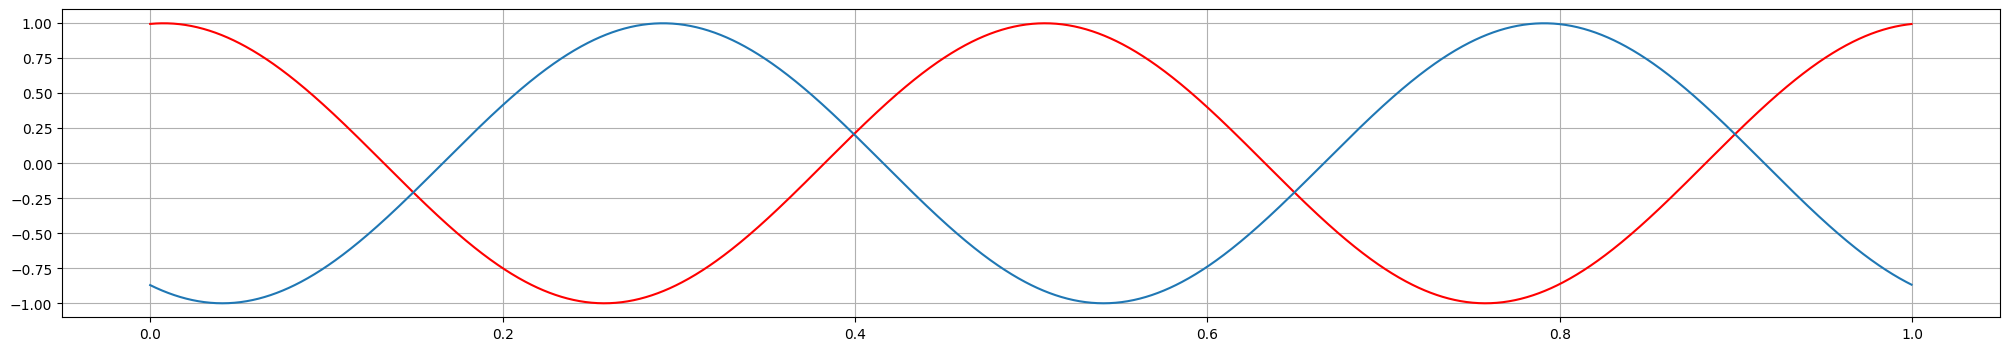

Vx[70] = 219.8


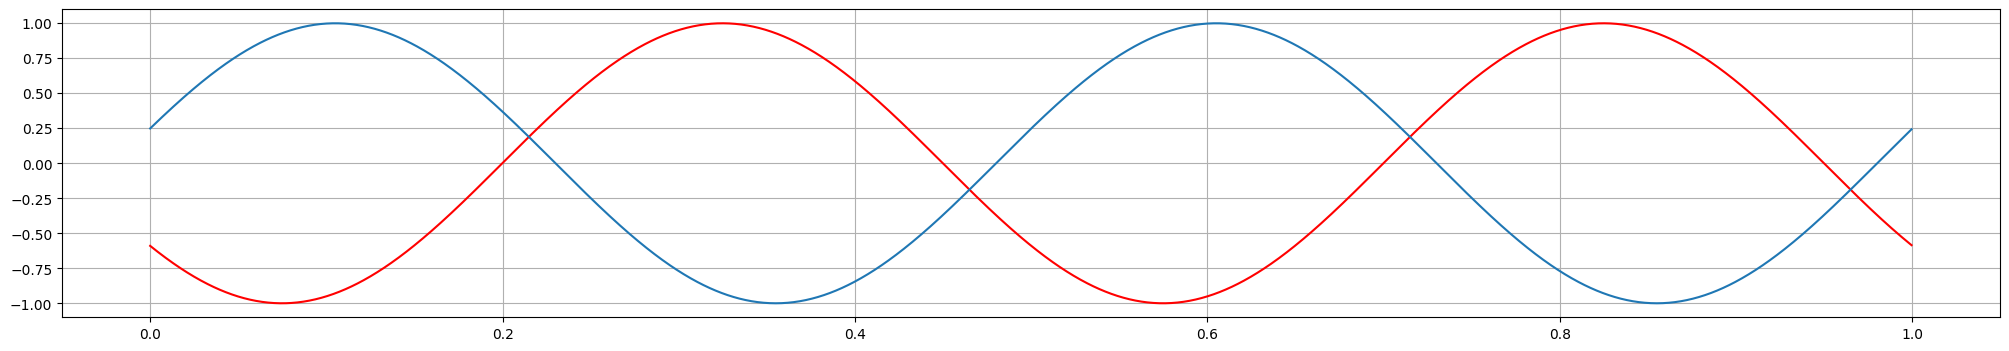

Vx[71] = 222.94


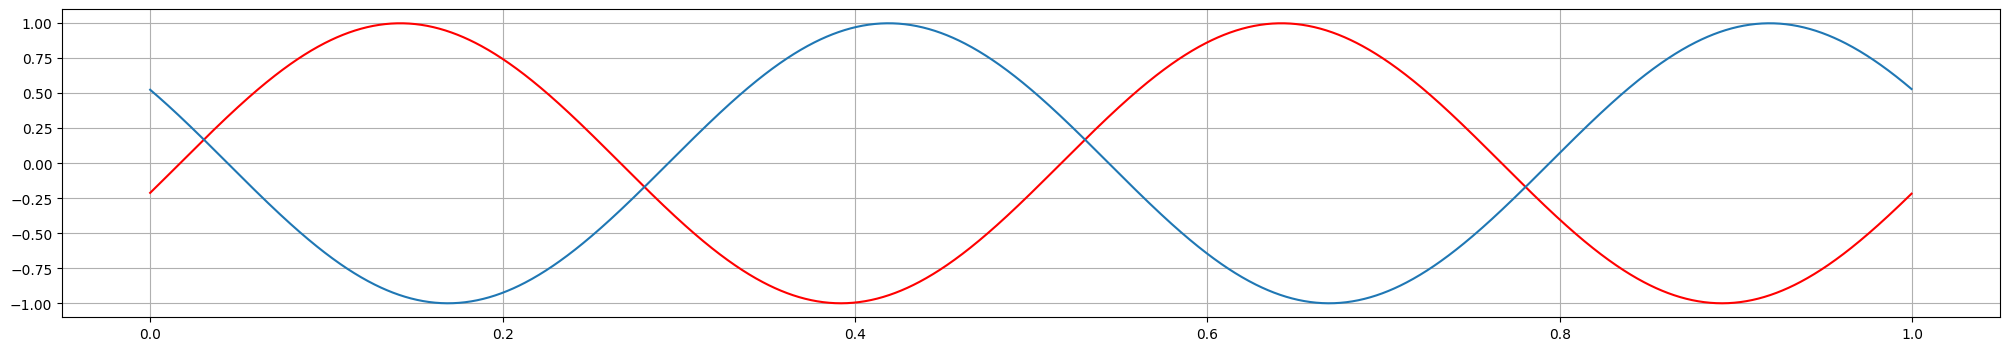

Vx[72] = 226.08


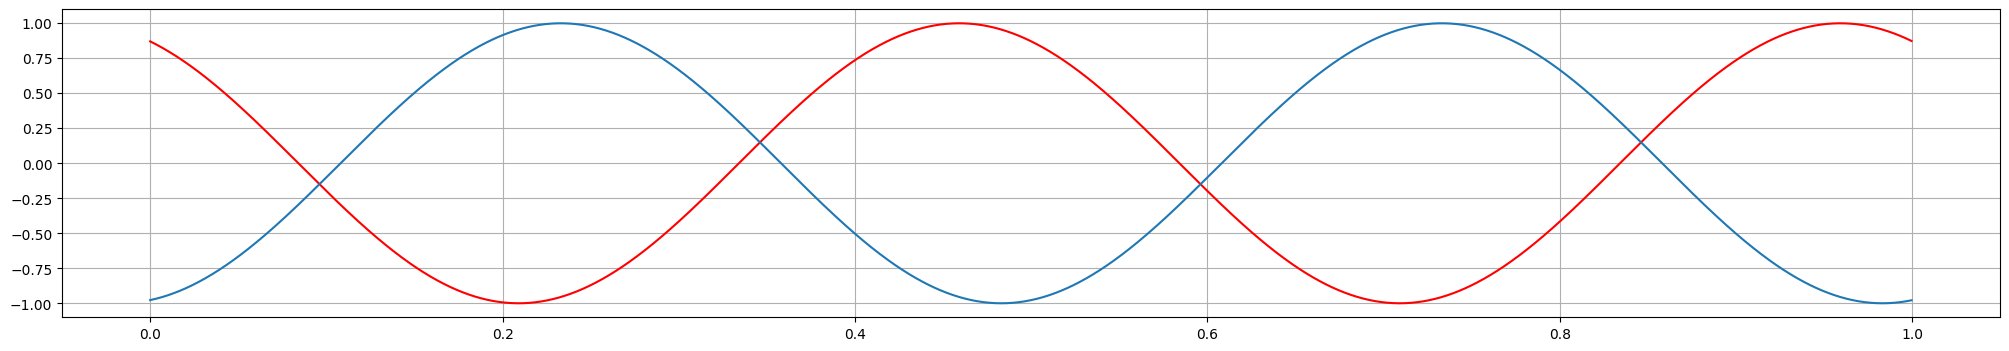

Vx[73] = 229.22


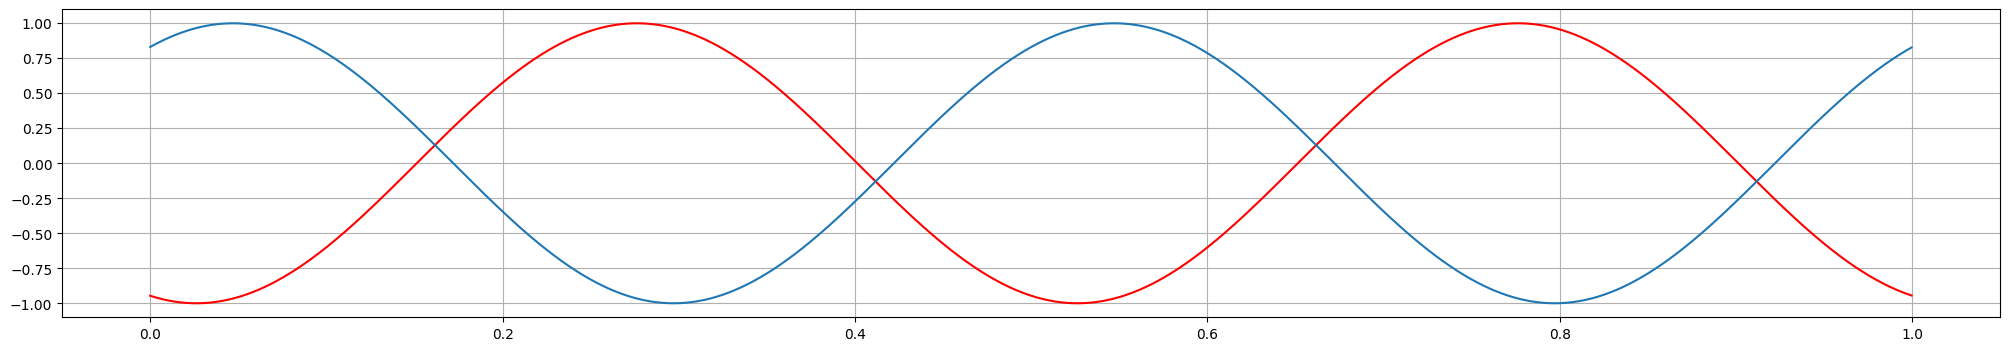

Vx[74] = 232.36


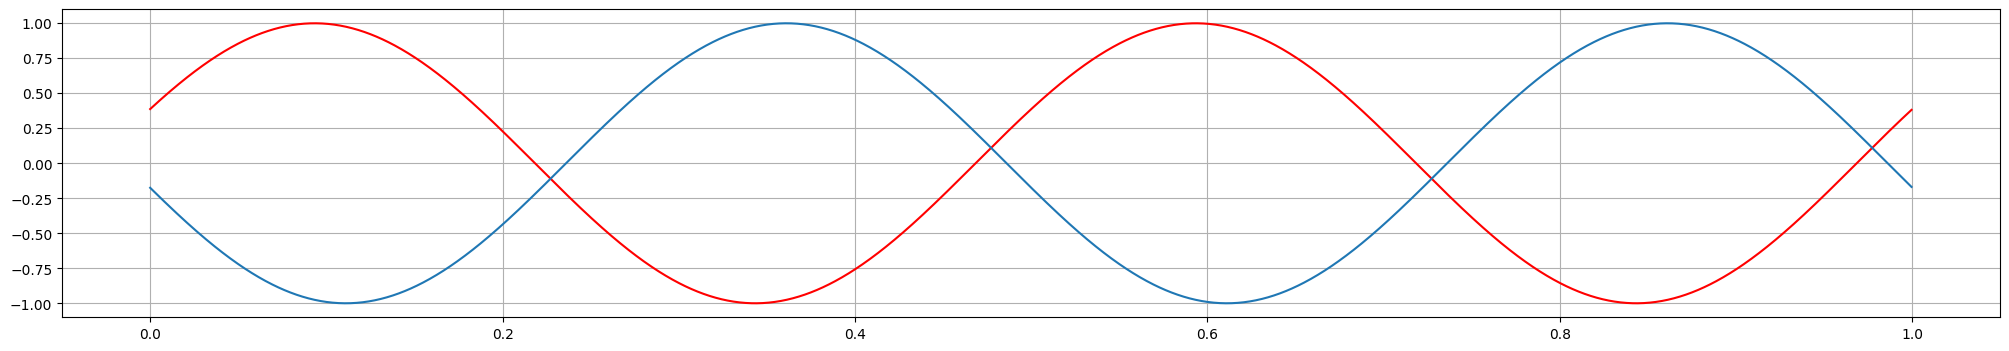

Vx[75] = 235.5


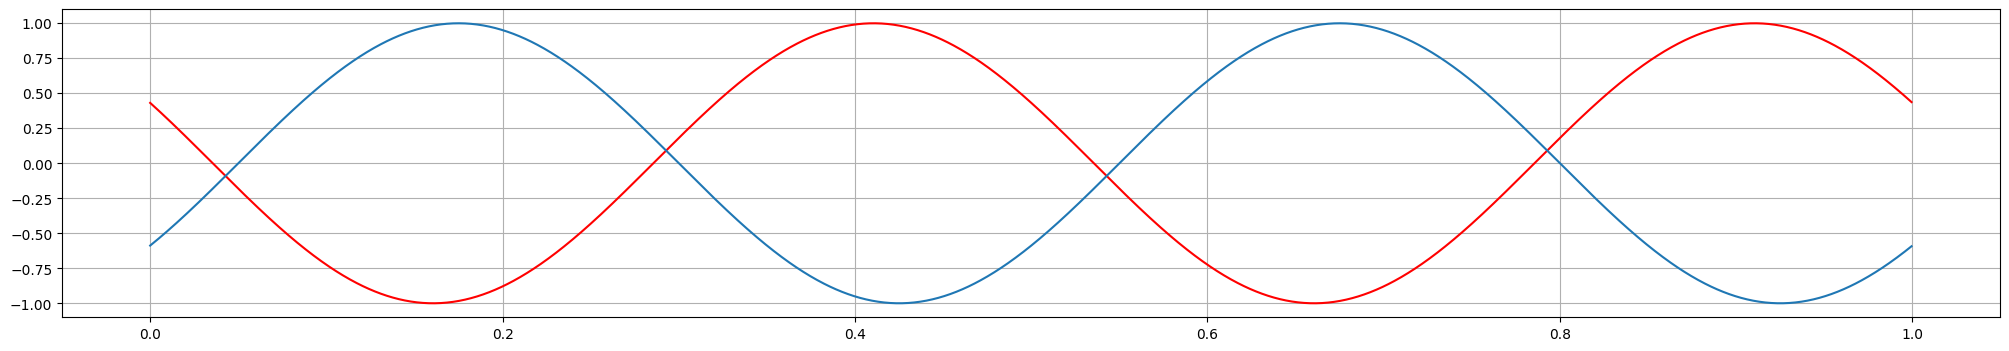

Vx[76] = 238.64000000000001


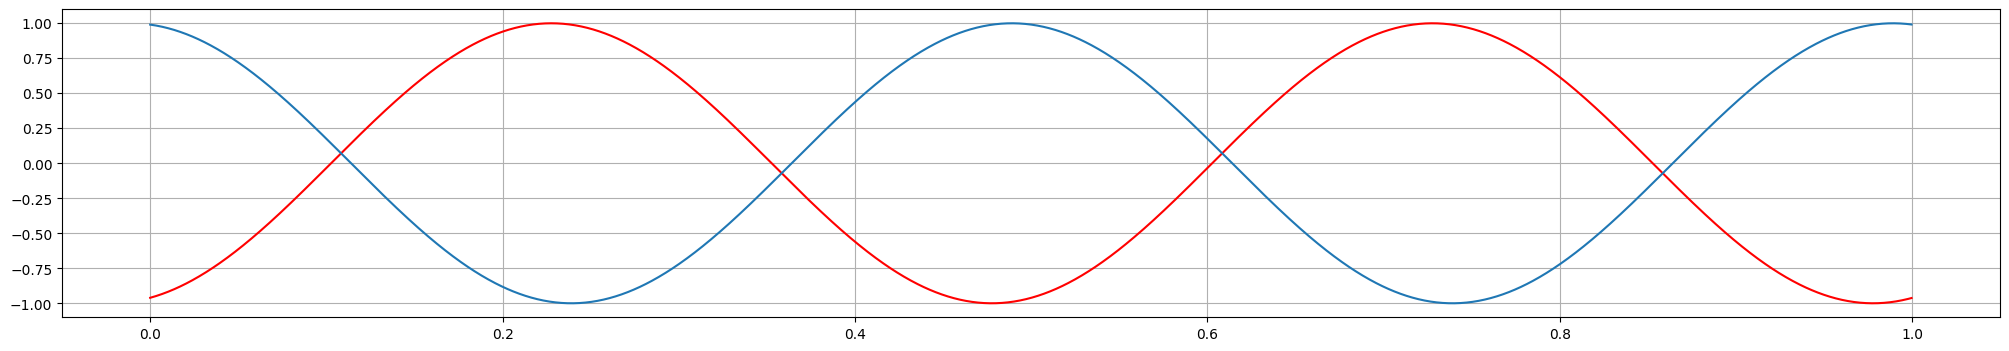

Vx[77] = 241.78


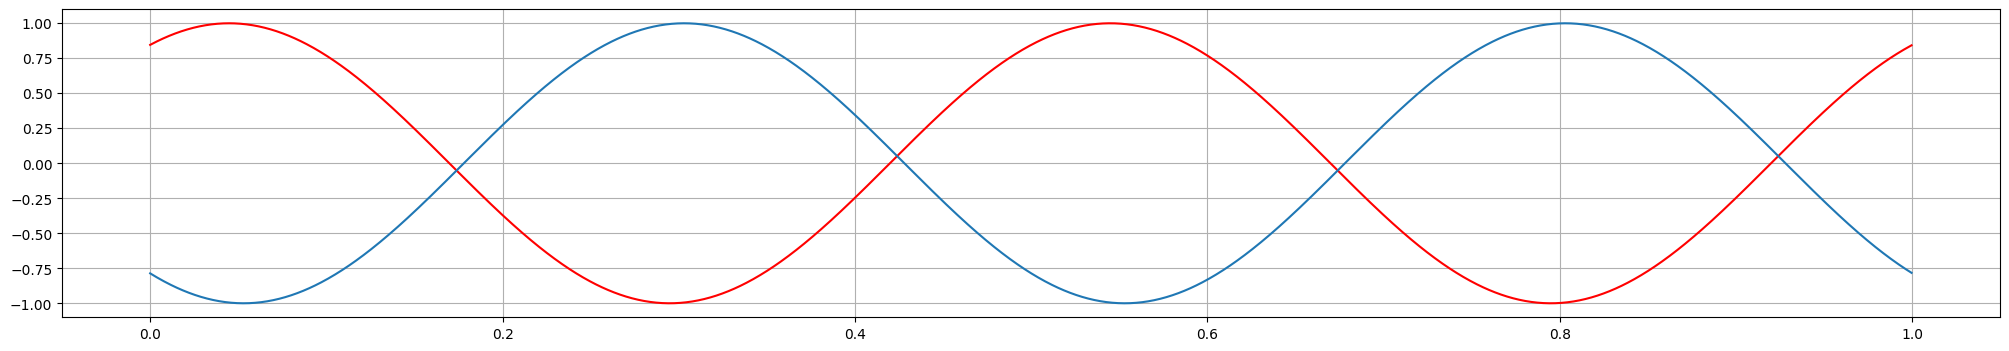

Vx[78] = 244.92000000000002


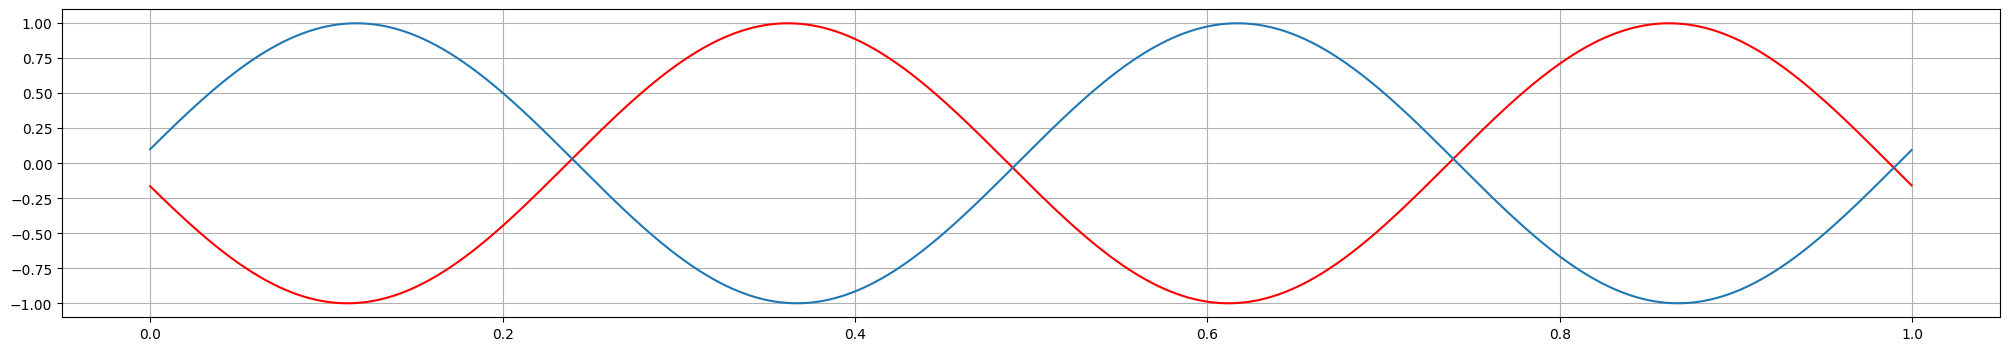

Vx[79] = 248.06


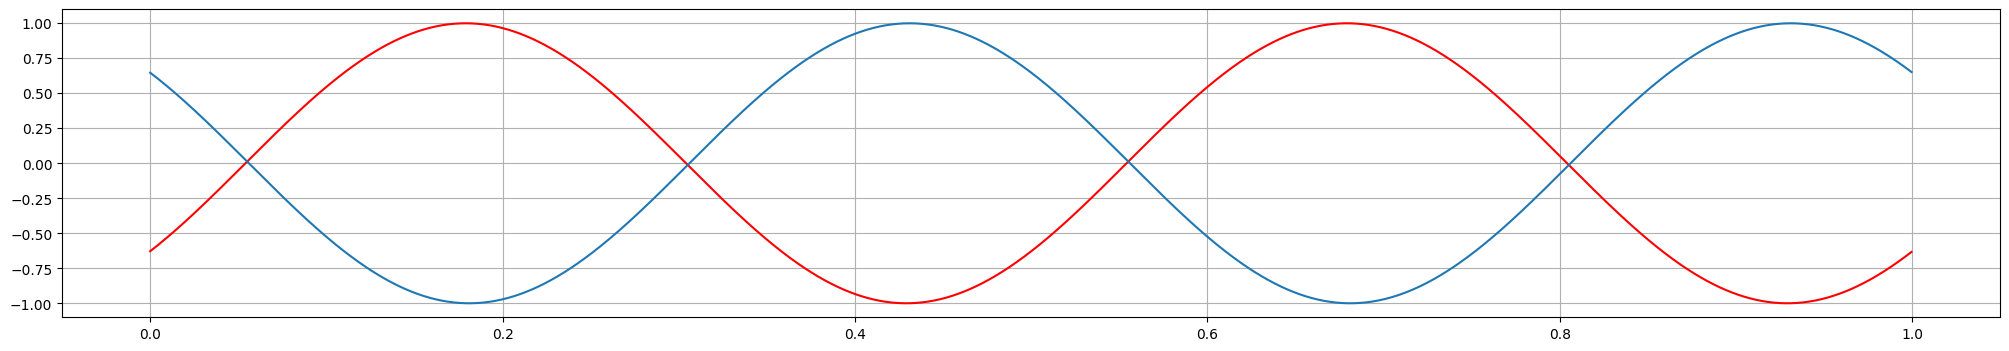

Vx[80] = 251.20000000000002


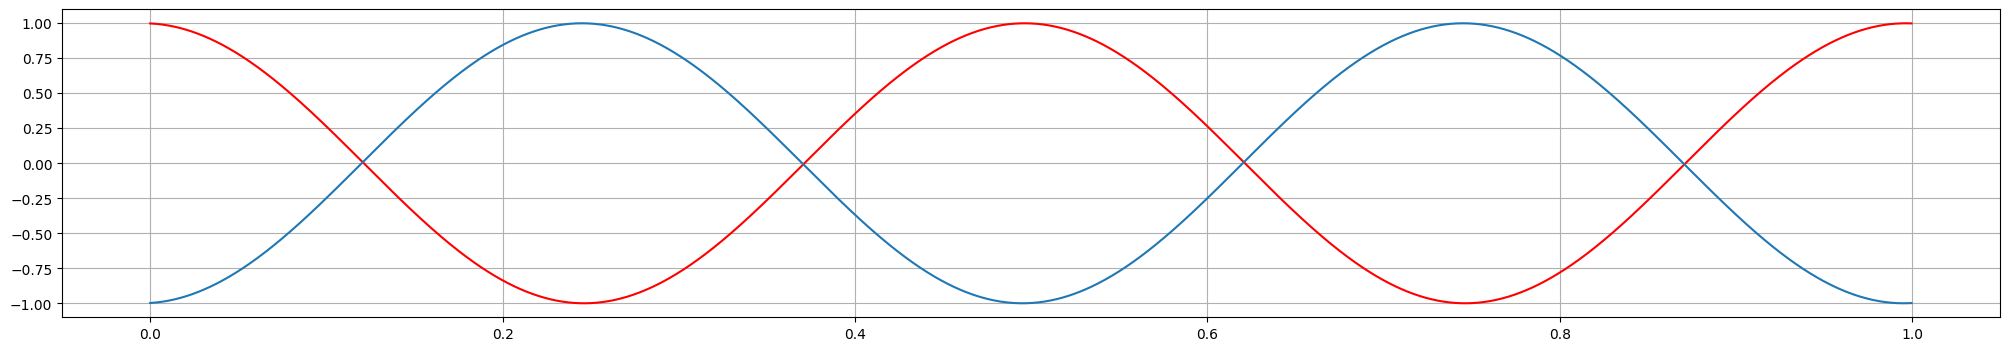

Vx[81] = 254.34


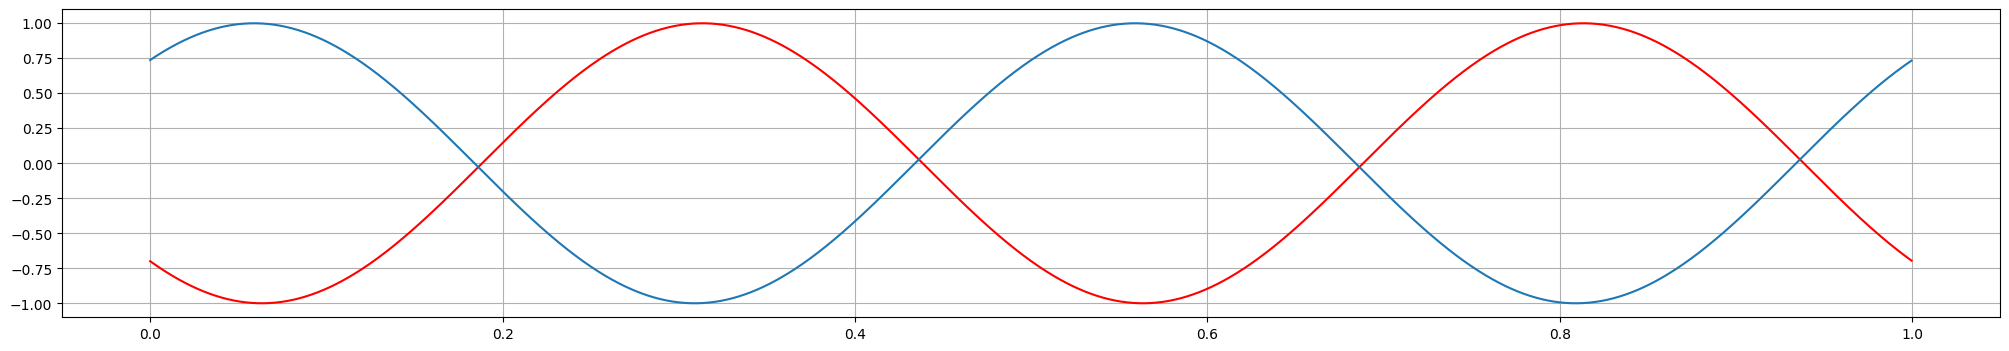

Vx[82] = 257.48


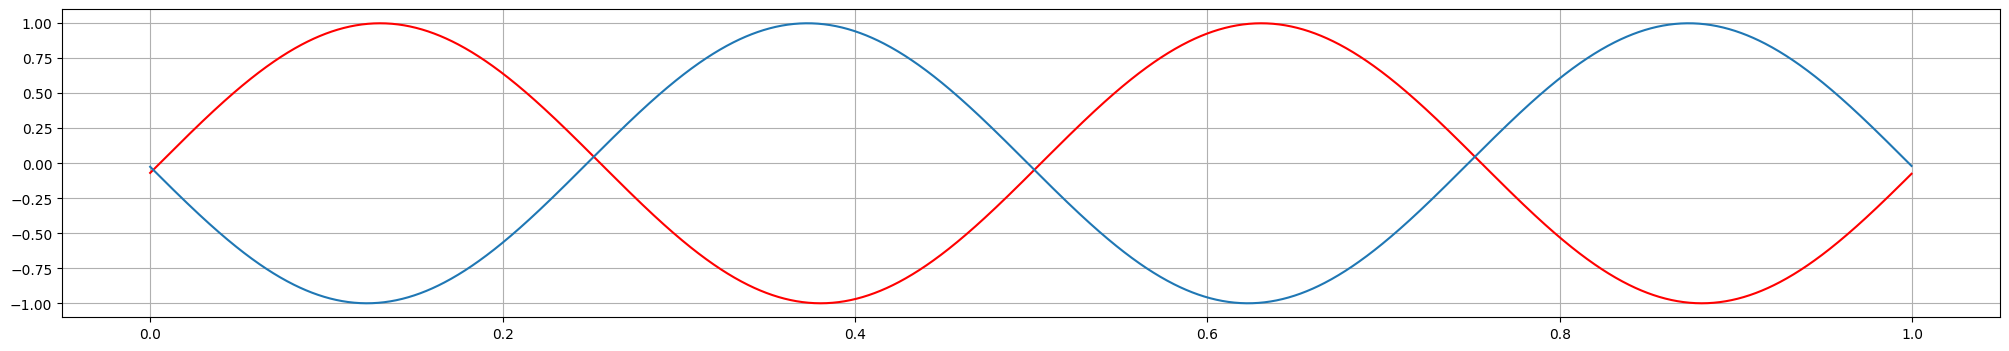

Vx[83] = 260.62


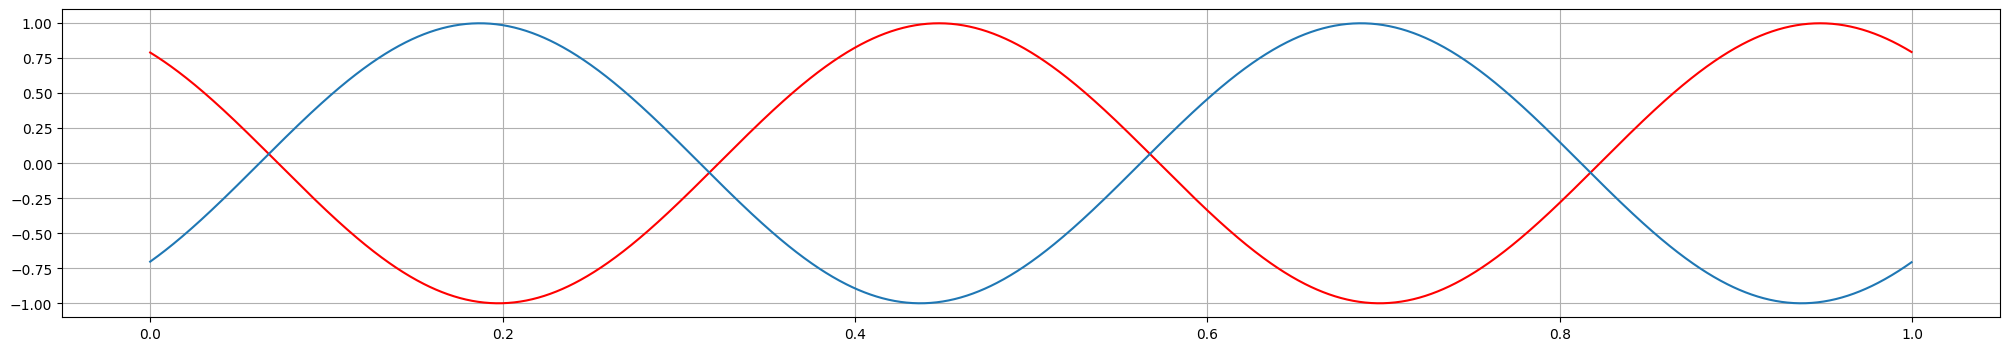

Vx[84] = 263.76


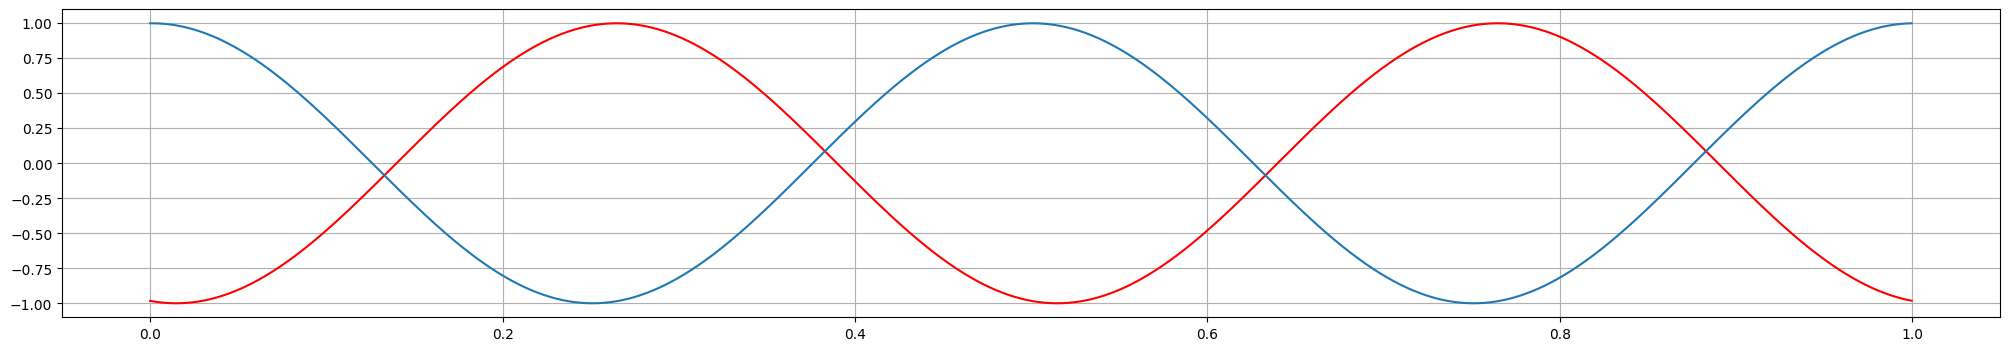

Vx[85] = 266.90000000000003


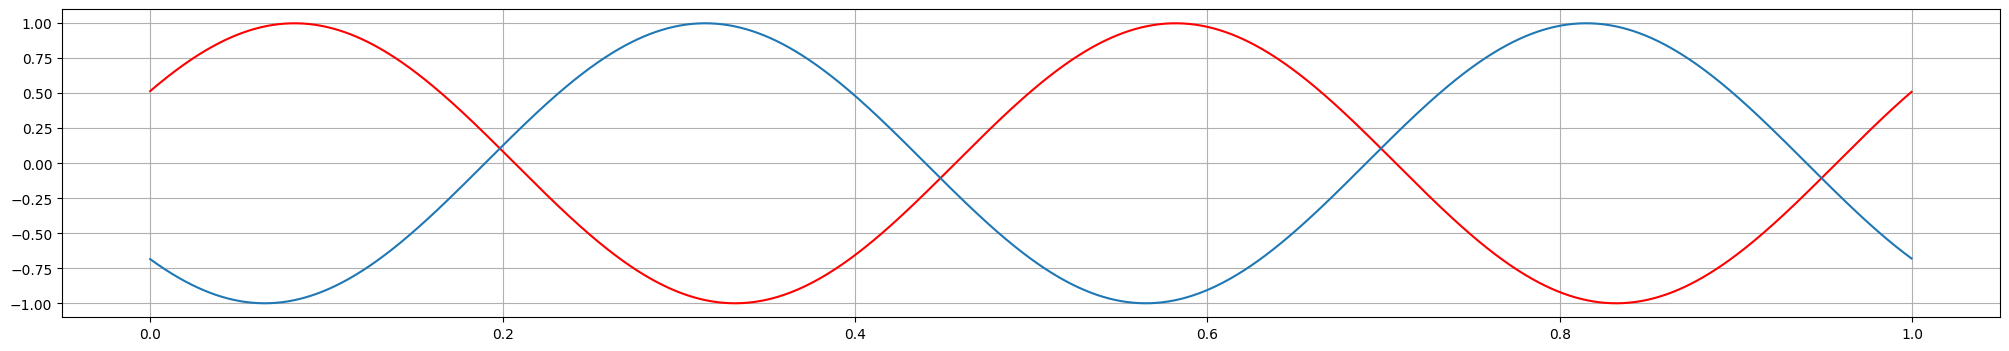

Vx[86] = 270.04


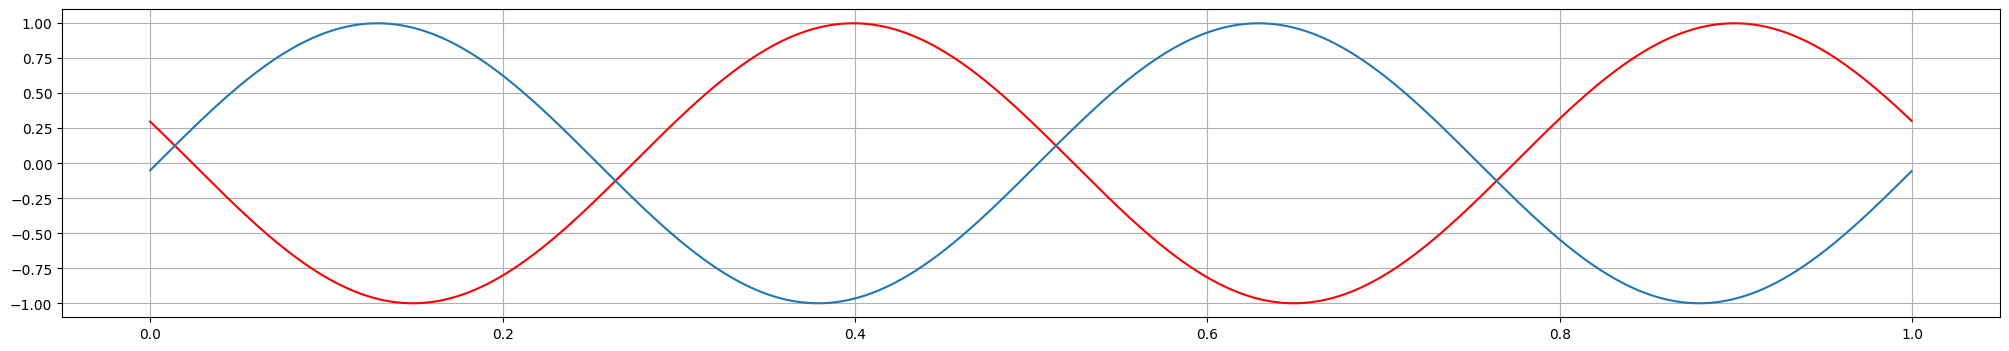

Vx[87] = 273.18


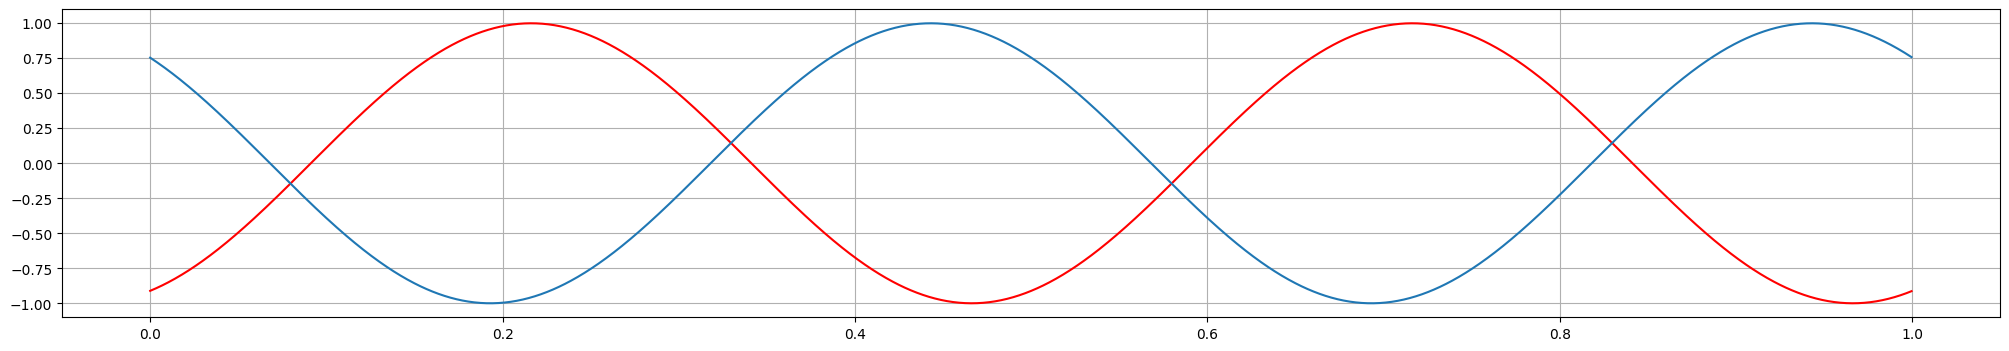

Vx[88] = 276.32


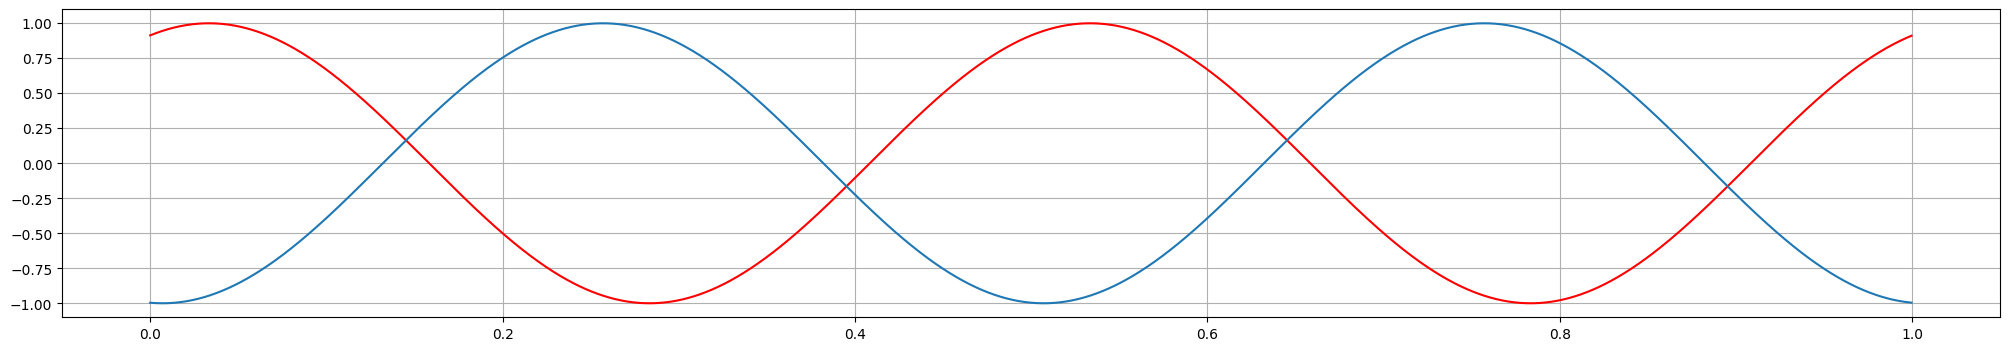

Vx[89] = 279.46000000000004


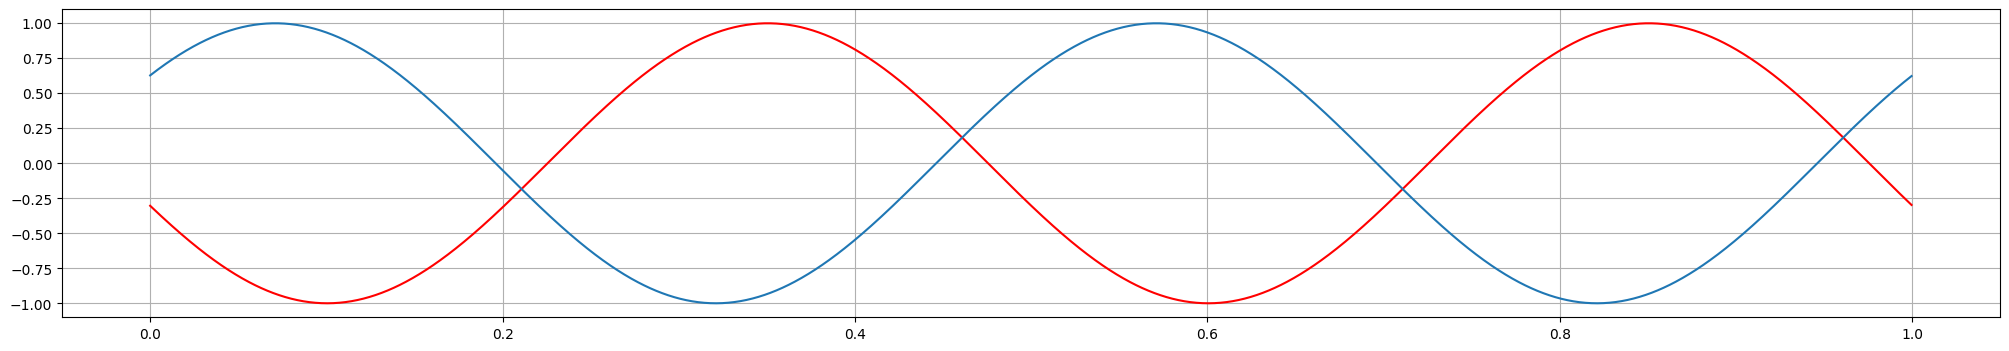

Vx[90] = 282.6


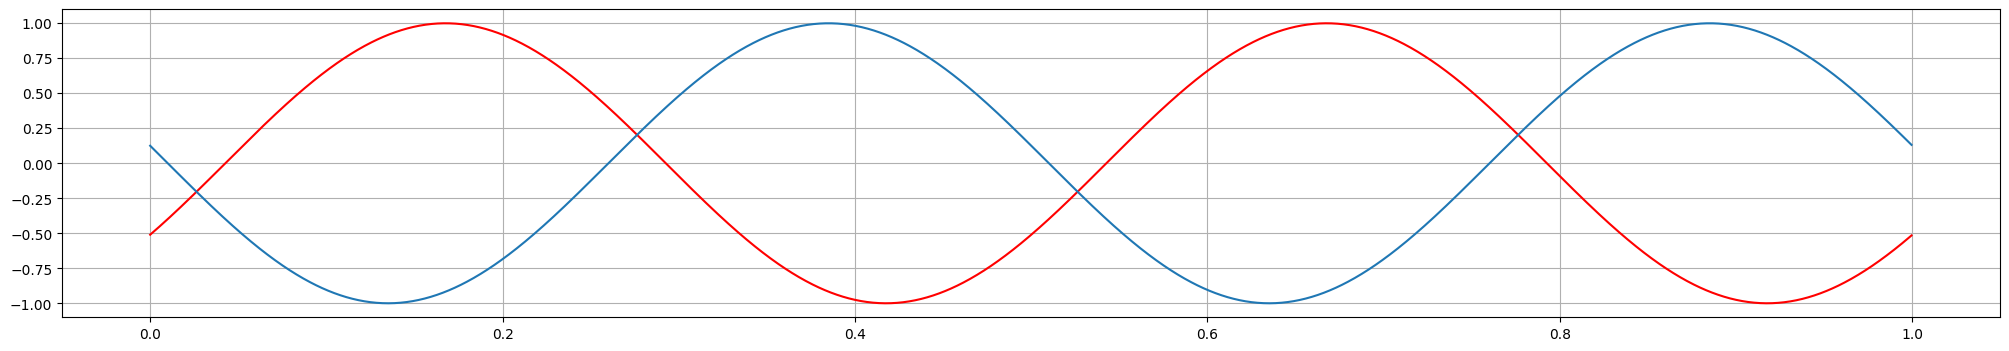

Vx[91] = 285.74


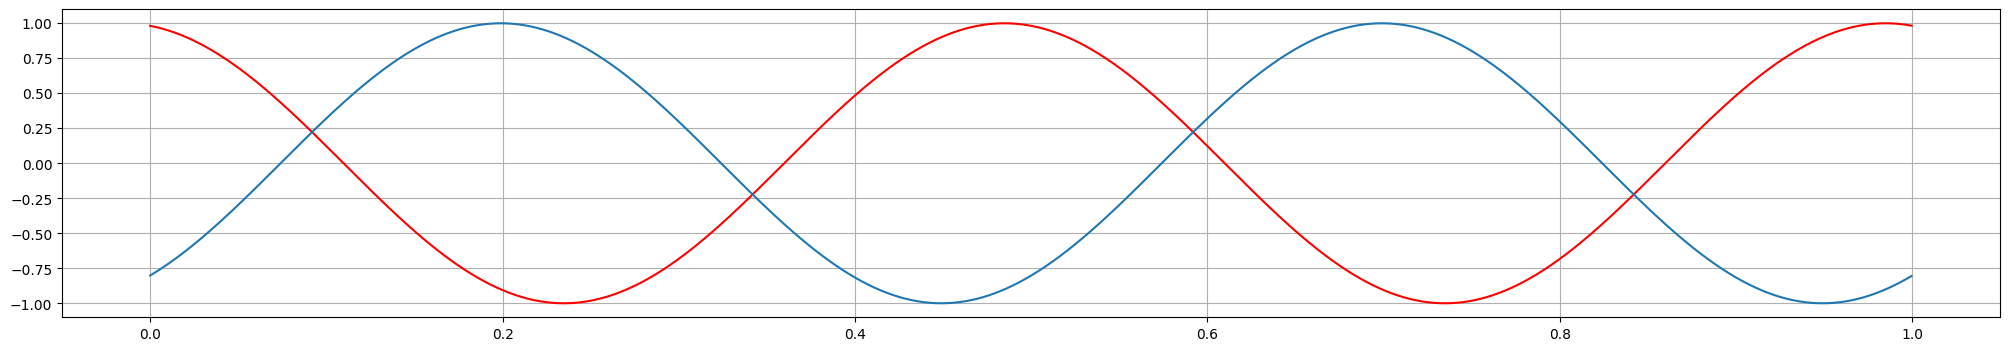

Vx[92] = 288.88


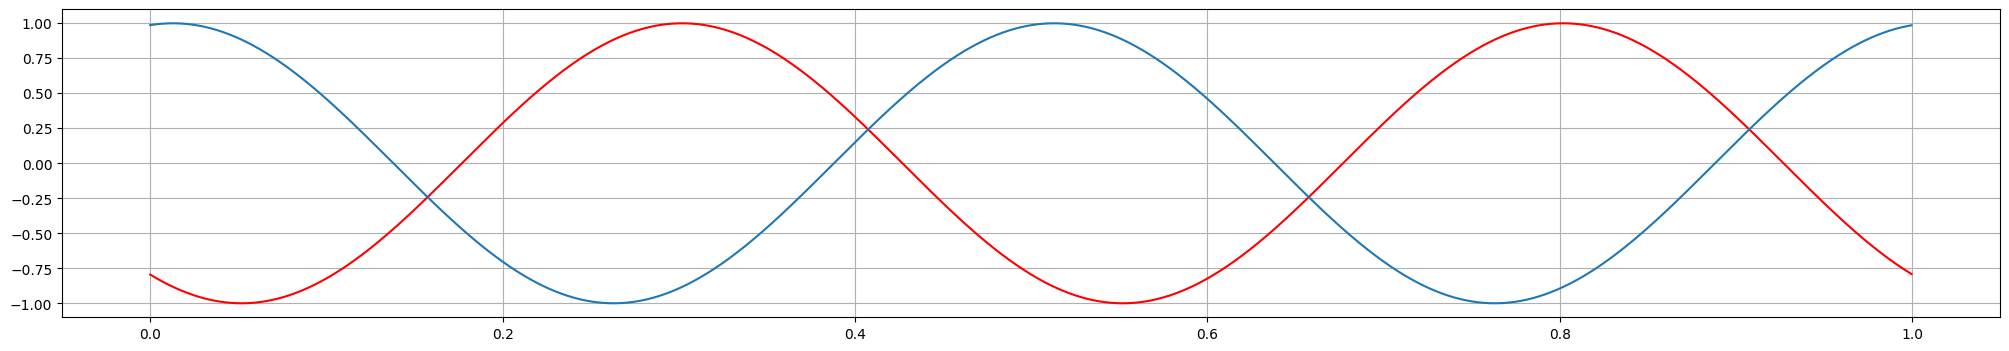

Vx[93] = 292.02000000000004
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/local/home/am273028/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_18246/1908888594.py", line 14, in <module>
    plt.show()
  File "/local/home/am273028/.local/lib/python3.8/site-packages/matplotlib/pyplot.py", line 421, in show
    return _get_backend_mod().show(*args, **kwargs)
  File "/local/home/am273028/.local/lib/python3.8/site-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/local/home/am273028/.local/lib/python3.8/site-packages/IPython/core/display_functions.py", line 305, in display
    publish_display_data(data=format_dict, metadata=md_dict, **kwargs)
  File "/local/home/am273028/.local/lib/python3.8/site-packages/IPython/core/display_functions.py", line 93, in publish_display_data
    display_pub.publish(
  File "/local/home/am273028/.local/lib/python3.8/site-packages/ipyke

In [33]:
t = nIter*dt
x = np.arange(minX, maxX, step=dx)

for iloc in range(len(df)):
# for iloc in range(10):
    currV = minVx + iloc * dVx
    print(f"Vx[{iloc}] = {currV}")

    plt.figure(figsize=(25,4))
    y = df.iloc[iloc]
    plt.plot(x, y, '-r') #plot numerical approximation
    plt.plot(x, np.sin((x - t*currV)*4*math.pi)) #plot the exact solution for this Vx
    plt.grid()
    plt.show()
